##Unsupervised Customer Segmentation in E-Commerce


**Members: Aparna Kalla, Emre Can Baykurt, Sai Nruthya Vaka, Jaynender Singh**

## Problem Statement

In today’s fast-evolving e-commerce landscape, businesses struggle to gain deep insights into customer behavior beyond basic transactional metrics. Traditional segmentation approaches rely on predefined categories, which fail to capture hidden purchasing patterns, leading to inefficient marketing, poor product recommendations, and missed revenue opportunities. Without leveraging data-driven insights, companies face difficulties in optimizing decision-making processes and enhancing customer satisfaction.

This project addresses these challenges by utilizing unsupervised machine learning techniques, such as clustering and association rule mining, to identify natural customer segments based on transactional data. The dataset includes invoice records, product descriptions, purchase quantities, pricing, timestamps, and customer geographic details, providing a comprehensive foundation for behavioral analysis.

Key attributes such as InvoiceNo (purchase tracking), StockCode & Description (product details), Quantity (purchase volume), InvoiceDate (transaction timing), UnitPrice (pricing), CustomerID (unique identifier), and Country (customer location) are leveraged to uncover purchasing patterns and segment customers effectively.

By analyzing transaction trends, businesses can:
- Personalize marketing campaigns based on real customer behavior.
- Enhance product recommendations by identifying frequently purchased items together.
- Predict customer churn and improve retention strategies.
- Optimize inventory management by understanding seasonality and regional demand.

This data-driven segmentation approach will enable businesses to allocate resources efficiently, improve customer engagement, and increase revenue through targeted marketing, smarter inventory decisions, and personalized shopping experiences.

## Motivation

In the highly competitive and data-driven e-commerce industry, effective customer segmentation is essential for businesses to enhance personalization, optimize marketing efforts, and improve customer retention. Understanding customer behavior at a granular level allows companies to deliver targeted promotions, recommend relevant products, and refine user experiences, ultimately driving higher engagement, conversion rates, and long-term revenue growth.

Traditional segmentation methods rely on static, predefined categories that fail to capture evolving consumer preferences. By leveraging data-driven insights and machine learning techniques, businesses can move beyond rigid classifications to identify hidden purchasing patterns, enabling smarter resource allocation and more strategic decision-making. This approach provides companies with a sustainable competitive advantage, allowing them to adapt quickly to market changes and consumer trends while maximizing profitability.



**This data-driven segmentation will directly enhance several critical business areas:**

Implementing data-driven segmentation will significantly improve key business operations:

- Marketing Optimization: Personalized campaigns tailored to specific customer segments will enhance engagement and conversion rates, leading to a higher return on investment (ROI).
- Customer Retention: Identifying high-value and at-risk customers enables businesses to implement loyalty programs and retention strategies, reducing churn and fostering long-term relationships.
- Inventory Management: Understanding product demand variations across customer segments allows for better stock management, minimizing the risks of overstocking or understocking.

By transitioning from static segmentation to dynamic, data-driven insights, businesses can allocate resources efficiently, enhance customer satisfaction, and maintain a competitive edge in the rapidly evolving e-commerce landscape.

## **Data Dictionary**

| **Variable Name** | **Type**       | **Description**  |
|------------------|---------------|------------------|
| **InvoiceNo**    | Categorical   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'C', it indicates a cancellation. |
| **StockCode**    | Categorical   | A 5-digit integral number uniquely assigned to each distinct product. |
| **Description**  | Categorical   | Product name. |
| **Quantity**     | Integer       | The quantity of each product (item) per transaction. |
| **InvoiceDate**  | Date          | The day and time when each transaction was generated. |
| **UnitPrice**    | Continuous    | Product price per unit. |
| **CustomerID**   | Categorical   | A 5-digit integral number uniquely assigned to each customer. |
| **Country**      | Categorical   | The name of the country where each customer resides. |


##Data Cleaning

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Reading the data files.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1 = pd.read_excel('/Users/aparnakalla/Downloads/Online Retail 2.xlsx')
data2 = pd.read_excel('/Users/aparnakalla/Downloads/online_retail_II 2.xlsx')

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/packaging/core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/packaging/core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/packaging/core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/packagin

Standardizing Column Names for Consistency Across Multiple Files
Renaming columns across datasets ensures uniformity, making it easier to merge, analyze, and process the data. Inconsistent column names can lead to errors when performing joins, aggregations, and machine learning tasks. This step helps maintain data integrity, improves readability, and allows for seamless integration of multiple sources in later stages of analysis.

In [ ]:
data2 = data2.rename(columns={'Invoice': 'InvoiceNo', 'Customer ID': 'CustomerID', 'Price': 'UnitPrice'})

Concatinating the 2 datasets

In [ ]:
data = pd.concat([data1, data2], ignore_index=True)

Viewing null values

In [ ]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     243007
Country             0
dtype: int64

We can see that ~243k customer Ids are null and ~4k descriptions are null.

Unique invoice numbers:

In [ ]:
data.InvoiceNo.nunique()

53628

In [ ]:
invoice_customer_counts = data.groupby('InvoiceNo')['CustomerID'].nunique()

In [ ]:
invoice_customer_counts[invoice_customer_counts>1]

Series([], Name: CustomerID, dtype: int64)

Every invoice number is assosciated with one customerID.
For every NaN customer id we first check with the respective invoice number in the dataset and populate it. If the customer id is still NaN, we will  create new customerIDs by grouping by invoice number.

In [ ]:
data.CustomerID.nunique()

5942

In [ ]:
max(data.CustomerID)

18287.0

Since the max available customerID is 18287 - we will create new IDs starting 19000.

In [ ]:
data[data['CustomerID'].isna()]

InvoiceNo StockCode                      Description  Quantity  \
622        536414     22139                              NaN        56   
1443       536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444       536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445       536544     21786               POLKADOT RAIN HAT          4   
1446       536544     21787            RAIN PONCHO RETROSPOT         2   
...           ...       ...                              ...       ...   
1067140    538159     21324                              NaN       -18   
1067141    538158     20892                              NaN       -32   
1067142    538160     20956                              NaN       288   
1067143    538161    46000S                     Dotcom sales      -100   
1067144    538162    46000M                     Dotcom sales      -100   

                InvoiceDate  UnitPrice  CustomerID         Country  
622     2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443    2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444    2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445    2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446    2010-12-01 14:32:00       1.66         NaN  United Kingdom  
...                     ...        ...         ...             ...  
1067140 2010-12-09 17:17:00       0.00         NaN  United Kingdom  
1067141 2010-12-09 17:17:00       0.00         NaN  United Kingdom  
1067142 2010-12-09 17:18:00       0.00         NaN  United Kingdom  
1067143 2010-12-09 17:25:00       0.00         NaN  United Kingdom  
1067144 2010-12-09 17:25:00       0.00         NaN  United Kingdom  

[243007 rows x 8 columns]

In [ ]:
data[data['CustomerID'].isna()]['InvoiceNo'].nunique()

8752

For example:

In [ ]:
data[data['InvoiceNo']==536414]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622        536414     22139         NaN        56 2010-12-01 11:52:00   
1045469    536414     22139         NaN        56 2010-12-01 11:52:00   

         UnitPrice  CustomerID         Country  
622            0.0         NaN  United Kingdom  
1045469        0.0         NaN  United Kingdom

We will replace the customerID in these 2 rows to newid.

In [ ]:
missing_customer_data = data[data['CustomerID'].isna()].copy()

This code block will map the existing customers and create new ids for new customers.

In [ ]:
existing_customer_map = data.dropna(subset=['CustomerID']).set_index('InvoiceNo')['CustomerID'].to_dict()


missing_customer_data['CustomerID'] = missing_customer_data['InvoiceNo'].map(existing_customer_map)


no_customer_invoices = missing_customer_data['CustomerID'].isna()

missing_customer_data.loc[no_customer_invoices, 'CustomerID'] = (
    missing_customer_data.loc[no_customer_invoices]
    .groupby('InvoiceNo').ngroup() + 19000
)


Around 44k customers were existing in the database already.

In [ ]:
len(existing_customer_map)

44876

In [ ]:
data.update(missing_customer_data)

In [ ]:
data.isna().sum()

InvoiceNo         0
StockCode         0
Description    4382
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

As seen here, no null customer id is present.

Moving on, lets examine if quantity column has negative values.

In [ ]:
data[data['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141       C536379         D                          Discount        -1   
154       C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235       C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236       C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237       C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...           ...       ...                               ...       ...   
1067140    538159     21324                               NaN       -18   
1067141    538158     20892                               NaN       -32   
1067143    538161    46000S                      Dotcom sales      -100   
1067144    538162    46000M                      Dotcom sales      -100   
1067191   C538164    35004B       SET OF 3 BLACK FLYING DUCKS        -1   

                InvoiceDate  UnitPrice  CustomerID         Country  
141     2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154     2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235     2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236     2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237     2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                     ...        ...         ...             ...  
1067140 2010-12-09 17:17:00       0.00     24002.0  United Kingdom  
1067141 2010-12-09 17:17:00       0.00     24001.0  United Kingdom  
1067143 2010-12-09 17:25:00       0.00     24004.0  United Kingdom  
1067144 2010-12-09 17:25:00       0.00     24005.0  United Kingdom  
1067191 2010-12-09 17:32:00       1.95     14031.0  United Kingdom  

[22950 rows x 8 columns]

On observing further we see that some invoice numbers start w "C" and have q<0 - which tells us that they are canceled orders.

In [ ]:
data[(data['Quantity']<0) & (data['InvoiceNo'].str.startswith('C'))]

InvoiceNo StockCode                       Description  Quantity  \
141       C536379         D                          Discount        -1   
154       C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235       C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236       C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237       C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...           ...       ...                               ...       ...   
1066604   C538123     22956          36 FOIL HEART CAKE CASES        -2   
1066605   C538124         M                            Manual        -4   
1066606   C538124     22699  ROSES REGENCY TEACUP AND SAUCER         -1   
1066607   C538124     22423          REGENCY CAKESTAND 3 TIER        -1   
1067191   C538164    35004B       SET OF 3 BLACK FLYING DUCKS        -1   

                InvoiceDate  UnitPrice  CustomerID         Country  
141     2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154     2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235     2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236     2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237     2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                     ...        ...         ...             ...  
1066604 2010-12-09 15:41:00       2.10     12605.0         Germany  
1066605 2010-12-09 15:43:00       0.50     15329.0  United Kingdom  
1066606 2010-12-09 15:43:00       2.95     15329.0  United Kingdom  
1066607 2010-12-09 15:43:00      12.75     15329.0  United Kingdom  
1067191 2010-12-09 17:32:00       1.95     14031.0  United Kingdom  

[19493 rows x 8 columns]

there are 19493 canceled invoices.

lets see if there rows which are not canceled invoice numbers but still have q<0.

In [ ]:
data[(data['Quantity']<0) & (~data['InvoiceNo'].astype(str).str.startswith('C'))]

InvoiceNo StockCode   Description  Quantity         InvoiceDate  \
2406       536589     21777           NaN       -10 2010-12-01 16:50:00   
4347       536764    84952C           NaN       -38 2010-12-02 14:42:00   
7188       536996     22712           NaN       -20 2010-12-03 15:30:00   
7189       536997     22028           NaN       -20 2010-12-03 15:30:00   
7190       536998     85067           NaN        -6 2010-12-03 15:30:00   
...           ...       ...           ...       ...                 ...   
1066367    538092     37467           NaN      -177 2010-12-09 14:49:00   
1067140    538159     21324           NaN       -18 2010-12-09 17:17:00   
1067141    538158     20892           NaN       -32 2010-12-09 17:17:00   
1067143    538161    46000S  Dotcom sales      -100 2010-12-09 17:25:00   
1067144    538162    46000M  Dotcom sales      -100 2010-12-09 17:25:00   

         UnitPrice  CustomerID         Country  
2406           0.0     23843.0  United Kingdom  
4347           0.0     23849.0  United Kingdom  
7188           0.0     23866.0  United Kingdom  
7189           0.0     23867.0  United Kingdom  
7190           0.0     23868.0  United Kingdom  
...            ...         ...             ...  
1066367        0.0     23977.0  United Kingdom  
1067140        0.0     24002.0  United Kingdom  
1067141        0.0     24001.0  United Kingdom  
1067143        0.0     24004.0  United Kingdom  
1067144        0.0     24005.0  United Kingdom  

[3457 rows x 8 columns]

So, these 3457 rows are basically returned. Lets add an "R" infront of these invoice numbers for distinguishing.

In [ ]:
mask = (data['Quantity'] < 0) & (~data['InvoiceNo'].astype(str).str.startswith('C'))
data.loc[mask, 'InvoiceNo'] = 'R' + data.loc[mask, 'InvoiceNo'].astype(str)

cross checking if "R" is added.

In [ ]:
data[(data['Quantity']<0) & (~data['InvoiceNo'].astype(str).str.startswith('C'))]

InvoiceNo StockCode   Description  Quantity         InvoiceDate  \
2406      R536589     21777           NaN       -10 2010-12-01 16:50:00   
4347      R536764    84952C           NaN       -38 2010-12-02 14:42:00   
7188      R536996     22712           NaN       -20 2010-12-03 15:30:00   
7189      R536997     22028           NaN       -20 2010-12-03 15:30:00   
7190      R536998     85067           NaN        -6 2010-12-03 15:30:00   
...           ...       ...           ...       ...                 ...   
1066367   R538092     37467           NaN      -177 2010-12-09 14:49:00   
1067140   R538159     21324           NaN       -18 2010-12-09 17:17:00   
1067141   R538158     20892           NaN       -32 2010-12-09 17:17:00   
1067143   R538161    46000S  Dotcom sales      -100 2010-12-09 17:25:00   
1067144   R538162    46000M  Dotcom sales      -100 2010-12-09 17:25:00   

         UnitPrice  CustomerID         Country  
2406           0.0     23843.0  United Kingdom  
4347           0.0     23849.0  United Kingdom  
7188           0.0     23866.0  United Kingdom  
7189           0.0     23867.0  United Kingdom  
7190           0.0     23868.0  United Kingdom  
...            ...         ...             ...  
1066367        0.0     23977.0  United Kingdom  
1067140        0.0     24002.0  United Kingdom  
1067141        0.0     24001.0  United Kingdom  
1067143        0.0     24004.0  United Kingdom  
1067144        0.0     24005.0  United Kingdom  

[3457 rows x 8 columns]

In [ ]:
data[data.UnitPrice <0 ]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   
721312   A506401         B  Adjust bad debt         1 2010-04-29 13:36:00   
818183   A516228         B  Adjust bad debt         1 2010-07-19 11:24:00   
945381   A528059         B  Adjust bad debt         1 2010-10-20 12:04:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06     27359.0  United Kingdom  
299984  -11062.06     27360.0  United Kingdom  
721312  -53594.36     27355.0  United Kingdom  
818183  -44031.79     27356.0  United Kingdom  
945381  -38925.87     27357.0  United Kingdom

We observe some UnitPrice being negative but that is okay since it is to Adjust bad debt

In [ ]:
data[data.Description.isna()]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622        536414     22139         NaN        56 2010-12-01 11:52:00   
1970       536545     21134         NaN         1 2010-12-01 14:32:00   
1971       536546     22145         NaN         1 2010-12-01 14:33:00   
1972       536547     37509         NaN         1 2010-12-01 14:33:00   
1987       536549    85226A         NaN         1 2010-12-01 14:34:00   
...           ...       ...         ...       ...                 ...   
1066639    538141     22218         NaN         2 2010-12-09 15:58:00   
1066640    538143    84534B         NaN         1 2010-12-09 15:58:00   
1067140   R538159     21324         NaN       -18 2010-12-09 17:17:00   
1067141   R538158     20892         NaN       -32 2010-12-09 17:17:00   
1067142    538160     20956         NaN       288 2010-12-09 17:18:00   

         UnitPrice  CustomerID         Country  
622            0.0     23830.0  United Kingdom  
1970           0.0     23832.0  United Kingdom  
1971           0.0     23833.0  United Kingdom  
1972           0.0     23834.0  United Kingdom  
1987           0.0     23835.0  United Kingdom  
...            ...         ...             ...  
1066639        0.0     23993.0  United Kingdom  
1066640        0.0     23995.0  United Kingdom  
1067140        0.0     24002.0  United Kingdom  
1067141        0.0     24001.0  United Kingdom  
1067142        0.0     24003.0  United Kingdom  

[4382 rows x 8 columns]

Here, we can see that for one StockCode there are 4 different types of description.

In [ ]:
data[data.StockCode==22139]['Description'].value_counts()

Description
RETROSPOT TEA SET CERAMIC 11 PC      1368
RETRO SPOT TEA SET CERAMIC 11 PC      813
amazon                                  2
11 PC CERAMIC TEA SET POLKADOT          1
Name: count, dtype: int64

In [ ]:
data[data.StockCode==20956]['Description'].value_counts()

Description
PORCELAIN T-LIGHT HOLDERS ASSORTED    261
?                                       2
check                                   1
Name: count, dtype: int64

We see that one StockCode has multiple but similar description so we will replace the description with the most commonly occuring one.

In [ ]:
description_mode = (
    data.dropna(subset=['Description'])
    .groupby('StockCode')['Description']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

data['Description'] = data['Description'].fillna(data['StockCode'].map(description_mode))

In [ ]:
data[data.Description.isna()]

InvoiceNo     StockCode Description  Quantity         InvoiceDate  \
74825    R542529      DCGS0055         NaN        -1 2011-01-28 13:08:00   
74839    R542532      DCGS0074         NaN        -1 2011-01-28 13:09:00   
75295    R542582      DCGS0057         NaN        -6 2011-01-28 15:01:00   
108688   R545566        37477D         NaN        -9 2011-03-03 16:14:00   
279252   R561250      DCGS0071         NaN        -2 2011-07-26 11:51:00   
...          ...           ...         ...       ...                 ...   
840748    518487  gift_0001_90         NaN        10 2010-08-09 12:28:00   
840752    518490  gift_0001_60         NaN        10 2010-08-09 12:29:00   
843950   R518785            C3         NaN     -4999 2010-08-11 16:55:00   
883904   R522781        84247D         NaN        -3 2010-09-16 14:38:00   
973344   R530600        85017D         NaN       -36 2010-11-03 15:17:00   

        UnitPrice  CustomerID         Country  
74825         0.0     24311.0  United Kingdom  
74839         0.0     24313.0  United Kingdom  
75295         0.0     24351.0  United Kingdom  
108688        0.0     24559.0  United Kingdom  
279252        0.0     26053.0  United Kingdom  
...           ...         ...             ...  
840748        0.0     22398.0  United Kingdom  
840752        0.0     22401.0  United Kingdom  
843950        0.0     22424.0  United Kingdom  
883904        0.0     22793.0  United Kingdom  
973344        0.0     23437.0  United Kingdom  

[363 rows x 8 columns]

There are still some NaN but we will deal with that in later stages.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of examining, summarizing, and visualizing a dataset to understand its structure, detect patterns, identify anomalies, and derive insights before applying advanced modeling techniques.

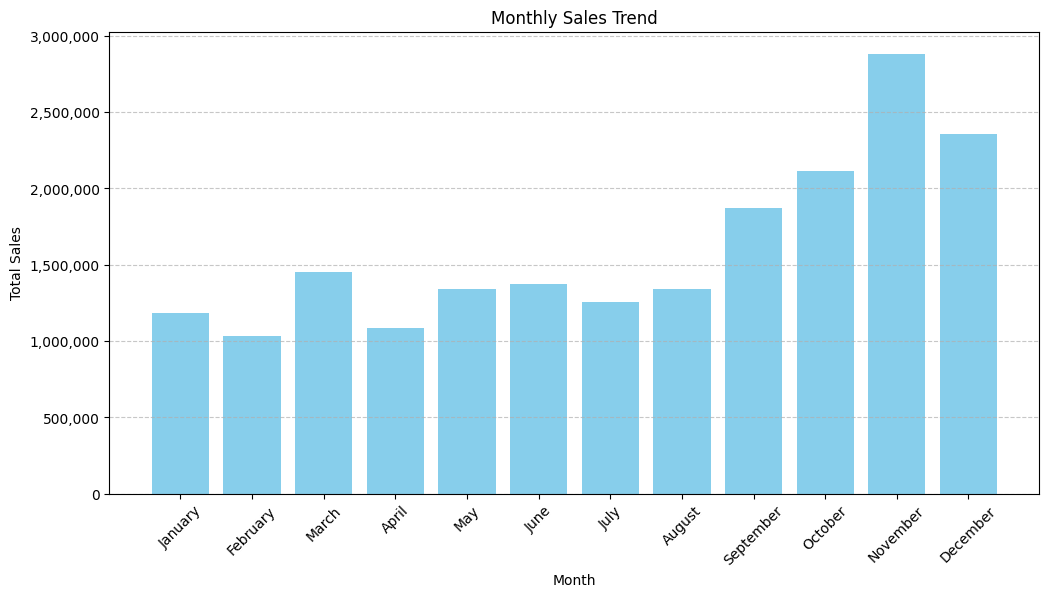

In [ ]:
monthly_trend = data.groupby('Month')['total_price'].sum().reset_index()

# Convert month numbers to month names
monthly_trend['Month'] = monthly_trend['Month'].apply(lambda x: calendar.month_name[x])

# Plot the trend as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_trend['Month'], monthly_trend['total_price'], color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Format y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

The bar chart illustrates the monthly sales trend throughout the year. Sales remain relatively steady in the first half, with a noticeable peak in March. A decline is observed during the summer months, particularly in July and August. However, sales experience a significant surge from September onwards, reaching the highest point in November, likely due to holiday shopping. December maintains strong sales, though slightly lower than November. This pattern suggests a seasonal impact on consumer purchasing behavior.

<ipython-input-159-f7d99a1843ae>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




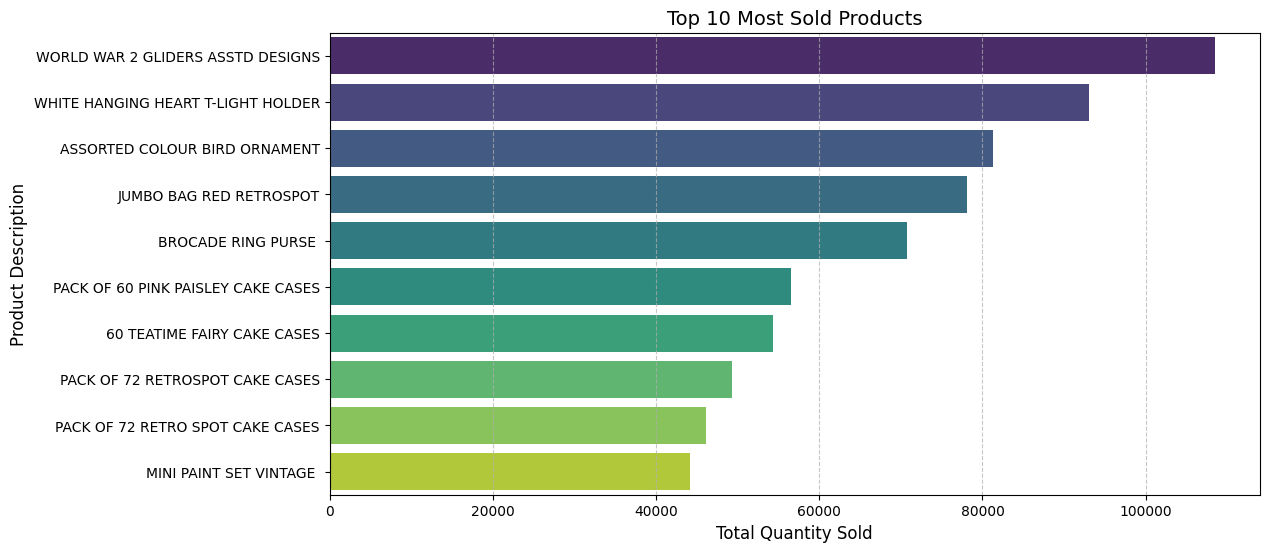

In [ ]:
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


plt.title('Top 10 Most Sold Products', fontsize=14)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.show()

The best-selling product is "WORLD WAR 2 GLIDERS ASSTD DESIGNS," followed closely by "WHITE HANGING HEART T-LIGHT HOLDER," highlighting the strong demand for decorative and novelty items. Additionally, the presence of cake cases and popcorn holders among the top 10 bestsellers suggests that baking and party-related products are frequently purchased together. This trend provides valuable insights for Market Basket Analysis, enabling businesses to identify complementary product pairings and optimize cross-selling strategies.

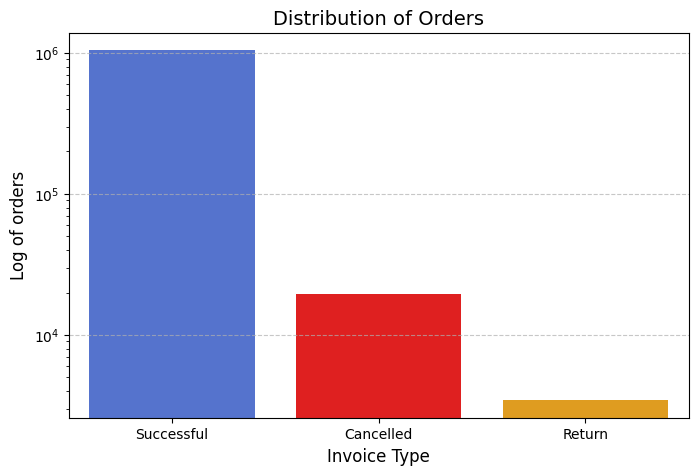

In [ ]:
def categorize_invoice(invoice_no):
    if str(invoice_no).startswith('R'):
        return 'Return'
    elif str(invoice_no).startswith('C'):
        return 'Cancelled'
    else:
        return 'Successful'

data['Invoice_Type'] = data['InvoiceNo'].apply(categorize_invoice)
invoice_counts = data['Invoice_Type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=invoice_counts.index, y=invoice_counts.values, palette=['royalblue', 'red', 'orange'])
plt.yscale('log')
plt.title('Distribution of Orders', fontsize=14)
plt.xlabel('Invoice Type', fontsize=12)
plt.ylabel('Log of orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart illustrates the distribution of orders by invoice type using a logarithmic scale. "Successful" orders dominate with the highest count, significantly outnumbering both "Cancelled" and "Return" orders. "Cancelled" orders occur at a much lower frequency, while "Return" orders are the least common. This indicates a high success rate in transactions, with relatively low cancellation and return rates, suggesting efficient order fulfillment and customer satisfaction.

Here, we create a new column called "total_price".

In [ ]:
data['total_price'] = data['Quantity'] * data['UnitPrice']

data.sort_values(by='total_price', ascending=False)

InvoiceNo StockCode                          Description  Quantity  \
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   
61619     541431     23166       MEDIUM CERAMIC TOP STORAGE JAR     74215   
222680    556444     22502       PICNIC BASKET WICKER 60 PIECES        60   
783736    512771         M                               Manual         1   
974085    530715     84347  ROTATING SILVER ANGELS T-LIGHT HLDR      9360   
...          ...       ...                                  ...       ...   
222681   C556445         M                               Manual        -1   
818183   A516228         B                      Adjust bad debt         1   
721312   A506401         B                      Adjust bad debt         1   
61624    C541433     23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
540422   C581484     23843          PAPER CRAFT , LITTLE BIRDIE    -80995   

               InvoiceDate  UnitPrice  CustomerID         Country  total_price  
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom    168469.60  
61619  2011-01-18 10:01:00       1.04     12346.0  United Kingdom     77183.60  
222680 2011-06-10 15:28:00     649.50     15098.0  United Kingdom     38970.00  
783736 2010-06-17 16:53:00   25111.09     21947.0  United Kingdom     25111.09  
974085 2010-11-04 11:36:00       1.69     15838.0  United Kingdom     15818.40  
...                    ...        ...         ...             ...          ...  
222681 2011-06-10 15:31:00   38970.00     15098.0  United Kingdom    -38970.00  
818183 2010-07-19 11:24:00  -44031.79     27356.0  United Kingdom    -44031.79  
721312 2010-04-29 13:36:00  -53594.36     27355.0  United Kingdom    -53594.36  
61624  2011-01-18 10:17:00       1.04     12346.0  United Kingdom    -77183.60  
540422 2011-12-09 09:27:00       2.08     16446.0  United Kingdom   -168469.60  

[1067370 rows x 9 columns]

The further analysis will done at the InvoiceNo level so we group the dataset by invoiceNo.

## Market Basket Analysis

Market Basket Analysis (MBA) is a data mining technique used to uncover patterns and relationships between products that are frequently purchased together. By analyzing transactional data, businesses can identify product associations, enabling them to implement personalized recommendations, cross-selling strategies, and targeted promotions. This approach is particularly valuable in e-commerce and retail, as it helps optimize product placement, bundle offerings, and marketing campaigns to enhance customer experience and drive revenue growth.

In [ ]:
df_grouped = data.groupby('InvoiceNo').agg(lambda x: list(x)).reset_index()
df_grouped

InvoiceNo                                          StockCode  \
0        489434  [85048, 79323P, 79323W, 22041, 21232, 22064, 2...   
1        489435                       [22350, 22349, 22195, 22353]   
2        489436  [48173C, 21755, 21754, 84879, 22119, 22142, 22...   
3        489437  [22143, 22145, 22130, 21364, 21360, 21351, 213...   
4        489438  [21329, 21252, 21100, 21033, 20711, 21410, 214...   
...         ...                                                ...   
53623   R581210                                            [23395]   
53624   R581212                                            [22578]   
53625   R581213                                            [22576]   
53626   R581226                                            [23090]   
53627   R581422                                            [23169]   

                                             Description  \
0      [15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...   
1      [CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...   
2      [DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...   
3      [CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...   
4      [DINOSAURS  WRITING SET , SET OF MEADOW  FLOWE...   
...                                                  ...   
53623                                            [check]   
53624                                             [lost]   
53625                                            [check]   
53626                                          [missing]   
53627                                          [smashed]   

                                                Quantity  \
0                       [12, 12, 12, 48, 24, 24, 24, 10]   
1                                       [12, 12, 24, 12]   
2      [10, 18, 3, 16, 3, 12, 12, 12, 16, 4, 2, 12, 1...   
3      [6, 6, 12, 2, 1, 2, 2, 2, 3, 12, 12, 6, 3, 12,...   
4      [28, 30, 30, 30, 60, 32, 32, 56, 56, 60, 56, 5...   
...                                                  ...   
53623                                              [-26]   
53624                                            [-1050]   
53625                                              [-30]   
53626                                             [-338]   
53627                                             [-235]   

                                             InvoiceDate  \
0      [2009-12-01 07:45:00, 2009-12-01 07:45:00, 200...   
1      [2009-12-01 07:46:00, 2009-12-01 07:46:00, 200...   
2      [2009-12-01 09:06:00, 2009-12-01 09:06:00, 200...   
3      [2009-12-01 09:08:00, 2009-12-01 09:08:00, 200...   
4      [2009-12-01 09:24:00, 2009-12-01 09:24:00, 200...   
...                                                  ...   
53623                              [2011-12-07 18:36:00]   
53624                              [2011-12-07 18:38:00]   
53625                              [2011-12-07 18:38:00]   
53626                              [2011-12-08 09:56:00]   
53627                              [2011-12-08 15:24:00]   

                                               UnitPrice  \
0        [6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1.25, 5.95]   
1                               [2.55, 3.75, 1.65, 2.55]   
2      [5.95, 5.45, 5.95, 1.69, 6.95, 1.45, 1.65, 1.6...   
3      [2.1, 2.1, 0.85, 6.75, 9.95, 6.75, 6.75, 8.95,...   
4      [0.98, 1.69, 1.15, 2.0, 1.3, 2.5, 2.5, 3.0, 3....   
...                                                  ...   
53623                                              [0.0]   
53624                                              [0.0]   
53625                                              [0.0]   
53626                                              [0.0]   
53627                                              [0.0]   

                                              CustomerID  \
0      [13085.0, 13085.0, 13085.0, 13085.0, 13085.0, ...   
1                   [13085.0, 13085.0, 13085.0, 13085.0]   
2      [13078.0, 13078.0, 13078.0, 13078.0, 13078.0, ...   
3      [15362.0, 15362.0, 15362.0, 15362.

A new column called "total_price_sum" is created.

In [ ]:
df_grouped['total_price_sum'] = df_grouped['total_price'].apply(lambda x: sum(x) if isinstance(x, list) else x)
df_grouped = df_grouped[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
                         'UnitPrice', 'CustomerID', 'Country', 'total_price', 'total_price_sum']]
df_grouped.head()

InvoiceNo                                          StockCode  \
0    489434  [85048, 79323P, 79323W, 22041, 21232, 22064, 2...   
1    489435                       [22350, 22349, 22195, 22353]   
2    489436  [48173C, 21755, 21754, 84879, 22119, 22142, 22...   
3    489437  [22143, 22145, 22130, 21364, 21360, 21351, 213...   
4    489438  [21329, 21252, 21100, 21033, 20711, 21410, 214...   

                                         Description  \
0  [15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...   
1  [CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...   
2  [DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...   
3  [CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...   
4  [DINOSAURS  WRITING SET , SET OF MEADOW  FLOWE...   

                                            Quantity  \
0                   [12, 12, 12, 48, 24, 24, 24, 10]   
1                                   [12, 12, 24, 12]   
2  [10, 18, 3, 16, 3, 12, 12, 12, 16, 4, 2, 12, 1...   
3  [6, 6, 12, 2, 1, 2, 2, 2, 3, 12, 12, 6, 3, 12,...   
4  [28, 30, 30, 30, 60, 32, 32, 56, 56, 60, 56, 5...   

                                         InvoiceDate  \
0  [2009-12-01 07:45:00, 2009-12-01 07:45:00, 200...   
1  [2009-12-01 07:46:00, 2009-12-01 07:46:00, 200...   
2  [2009-12-01 09:06:00, 2009-12-01 09:06:00, 200...   
3  [2009-12-01 09:08:00, 2009-12-01 09:08:00, 200...   
4  [2009-12-01 09:24:00, 2009-12-01 09:24:00, 200...   

                                           UnitPrice  \
0    [6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1.25, 5.95]   
1                           [2.55, 3.75, 1.65, 2.55]   
2  [5.95, 5.45, 5.95, 1.69, 6.95, 1.45, 1.65, 1.6...   
3  [2.1, 2.1, 0.85, 6.75, 9.95, 6.75, 6.75, 8.95,...   
4  [0.98, 1.69, 1.15, 2.0, 1.3, 2.5, 2.5, 3.0, 3....   

                                          CustomerID  \
0  [13085.0, 13085.0, 13085.0, 13085.0, 13085.0, ...   
1               [13085.0, 13085.0, 13085.0, 13085.0]   
2  [13078.0, 13078.0, 13078.0, 13078.0, 13078.0, ...   
3  [15362.0, 15362.0, 15362.0, 15362.0, 15362.0, ...   
4  [18102.0, 18102.0, 18102.0, 18102.0, 18102.0, ...   

                                             Country  \
0  [United Kingdom, United Kingdom, United Kingdo...   
1  [United Kingdom, United Kingdom, United Kingdo...   
2  [United Kingdom, United Kingdom, United Kingdo...   
3  [United Kingdom, United Kingdom, United Kingdo...   
4  [United Kingdom, United Kingdom, United Kingdo...   

                                         total_price  total_price_sum  
0  [83.4, 81.0, 81.0, 100.80000000000001, 30.0, 3...           505.30  
1  [30.599999999999998, 45.0, 39.599999999999994,...           145.80  
2  [59.5, 98.10000000000001, 17.85, 27.04, 20.85,...           630.33  
3  [12.600000000000001, 12.600000000000001, 10.2,...           310.75  
4  [27.439999999999998, 50.699999999999996, 34.5,...          2286.24

Upon some observation we can see that some rows have multiple timestamps - maybe due to the slow server, server crashes or time delays. To simplify our analysis - we only keep the first timestamp recorded.

In [ ]:
df_grouped['unique_timestamps'] = df_grouped['InvoiceDate'].apply(lambda x: len(set(x)) if isinstance(x, list) else 1)

df_grouped[df_grouped['unique_timestamps'] > 1]

InvoiceNo                                          StockCode  \
1578     492807  [85131A, 85129A, 85129D, 85129B, 85129A, 21645...   
2134     494166  [84971S, 84975, 84988, 84990, 84991, 84992, 85...   
4505     499967  [21524, 48185, 20723, 20724, 20725, 21937, 850...   
4733     500353  [22136, 21154, 22073, 20754, 79072, 21217, 212...   
4919     500827  [20984, 21033, 21035, 21107, 21110, 21116, 211...   
...         ...                                                ...   
37310    571735  [22086, 84879, 22456, 22457, 22427, 22424, 224...   
38391    574076  [10135, 15036, 16168M, 16236, 16237, 17038, 20...   
39328    576057  [21977, 21975, 84992, 84991, 23308, 23309, 212...   
40552    578548  [23322, 23323, 23221, 23219, 23223, 23210, 232...   
47249   C545569                              [22720, 22423, 22840]   

                                             Description  \
1578   [BEADED PEARL HEART WHITE ON STICK, WHITE PEAR...   
2134   [SMALL HEART FLOWERS HOOK , HEART SHAPED MIRRO...   
4505   [DOOR MAT SPOTTY HOME SWEET HOME, DOOR MAT FAI...   
4733   [LOVE HEART SOCK HANGER, RED SPOTTY OVEN GLOVE...   
4919   [12 PENCILS TALL TUBE POSY, JUMBO BAG CHARLIE ...   
...                                                  ...   
37310  [PAPER CHAIN KIT 50'S CHRISTMAS , ASSORTED COL...   
38391  [COLOURING PENCILS BROWN TUBE, ASSORTED COLOUR...   
39328  [PACK OF 60 PINK PAISLEY CAKE CASES, PACK OF 6...   
40552  [LARGE WHITE HEART OF WICKER, WHITE WICKER STA...   
47249  [SET OF 3 CAKE TINS PANTRY DESIGN , REGENCY CA...   

                                                Quantity  \
1578   [1, 2, 4, 3, 3, 12, 1, 6, 4, 6, 12, 2, 2, 2, 2...   
2134   [1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4505   [10, 10, 20, 20, 20, 15, 20, 20, 10, 20, 20, 4...   
4733   [12, 10, 4, 6, 2, 3, 24, 24, 24, 18, 6, 6, 6, ...   
4919   [1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 1, 1, ...   
...                                                  ...   
37310  [40, 40, 18, 48, 12, 8, 16, 48, 12, 12, 12, 12...   
38391  [1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 3, 3, 3, 1, ...   
39328  [6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 2, 2, 2, 6, ...   
40552  [2, 7, 5, 2, 1, 3, 1, 2, 3, 2, 5, 2, 3, 1, 1, ...   
47249                                       [-2, -3, -1]   

                                             InvoiceDate  \
1578   [2009-12-20 12:28:00, 2009-12-20 12:28:00, 200...   
2134   [2010-01-12 09:47:00, 2010-01-12 09:47:00, 201...   
4505   [2010-03-03 14:06:00, 2010-03-03 14:06:00, 201...   
4733   [2010-03-07 15:24:00, 2010-03-07 15:24:00, 201...   
4919   [2010-03-10 11:10:00, 2010-03-10 11:10:00, 201...   
...                                                  ...   
37310  [2011-10-19 10:03:00, 2011-10-19 10:03:00, 201...   
38391  [2011-11-02 15:37:00, 2011-11-02 15:38:00, 201...   
39328  [2011-11-13 15:05:00, 2011-11-13 15:05:00, 201...   
40552  [2011-11-24 15:02:00, 2011-11-24 15:02:00, 201...   
47249  [2011-03-03 16:25:00, 2011-03-03 16:26:00, 201...   

                                               UnitPrice  \
1578   [1.25, 1.25, 1.25, 1.25, 1.25, 1.65, 3.75, 4.9...   
2134   [1.66, 3.36, 2.98, 1.28, 1.28, 1.28, 2.51, 0.8...   
4505   [6.35, 6.35, 0.85, 0.85, 1.65, 2.95, 1.95, 1.9...   
4733   [1.65, 1.25, 3.75, 2.1, 9.95, 9.95, 0.55, 0.55...   
4919   [1.66, 5.91, 5.91, 5.91, 13.57, 8.47, 2.51, 12...   
...                                                  ...   
37310  [2.55, 1.69, 4.25, 2.55, 5.45, 10.95, 4.25, 1....   
38391  [2.46, 1.63, 0.83, 0.42, 0.42, 0.83, 4.13, 5.7...   
39328  [0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.5...   
40552  [2.95, 2.1, 0.83, 1.25, 0.83, 1.25, 0.83, 0.85...   
47249                                [4.95, 12.75, 7.95]   

                                              CustomerID  \
1578   [17211.0, 17211.0, 17211.0, 17211.0, 17211.0, ...   
2134   [19494.0, 19494.0, 19494.0, 19494.0, 19494.0, ...   
4505   [16636.0, 16636.0, 16636.0, 16636.0, 16636.0, ...   
4733   [12668.0, 12668.0, 12668.0, 12668.

For instance:

In [ ]:
invoice_dates = df_grouped[df_grouped['InvoiceNo'] == 492807]['InvoiceDate']

unique_dates = set([time for sublist in invoice_dates for time in sublist])
print(unique_dates)

{Timestamp('2009-12-20 12:28:00'), Timestamp('2009-12-20 12:29:00')}


Keeping only the first recorded timestamp

In [ ]:
df_grouped['InvoiceDate'] = df_grouped['InvoiceDate'].apply(lambda x: x[0] if isinstance(x, list) else x)
df_grouped['InvoiceDate'] = pd.to_datetime(df_grouped['InvoiceDate'])

df_grouped = df_grouped.drop(columns=['unique_timestamps'])

df_grouped


InvoiceNo                                          StockCode  \
0        489434  [85048, 79323P, 79323W, 22041, 21232, 22064, 2...   
1        489435                       [22350, 22349, 22195, 22353]   
2        489436  [48173C, 21755, 21754, 84879, 22119, 22142, 22...   
3        489437  [22143, 22145, 22130, 21364, 21360, 21351, 213...   
4        489438  [21329, 21252, 21100, 21033, 20711, 21410, 214...   
...         ...                                                ...   
53623   R581210                                            [23395]   
53624   R581212                                            [22578]   
53625   R581213                                            [22576]   
53626   R581226                                            [23090]   
53627   R581422                                            [23169]   

                                             Description  \
0      [15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...   
1      [CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...   
2      [DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...   
3      [CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...   
4      [DINOSAURS  WRITING SET , SET OF MEADOW  FLOWE...   
...                                                  ...   
53623                                            [check]   
53624                                             [lost]   
53625                                            [check]   
53626                                          [missing]   
53627                                          [smashed]   

                                                Quantity         InvoiceDate  \
0                       [12, 12, 12, 48, 24, 24, 24, 10] 2009-12-01 07:45:00   
1                                       [12, 12, 24, 12] 2009-12-01 07:46:00   
2      [10, 18, 3, 16, 3, 12, 12, 12, 16, 4, 2, 12, 1... 2009-12-01 09:06:00   
3      [6, 6, 12, 2, 1, 2, 2, 2, 3, 12, 12, 6, 3, 12,... 2009-12-01 09:08:00   
4      [28, 30, 30, 30, 60, 32, 32, 56, 56, 60, 56, 5... 2009-12-01 09:24:00   
...                                                  ...                 ...   
53623                                              [-26] 2011-12-07 18:36:00   
53624                                            [-1050] 2011-12-07 18:38:00   
53625                                              [-30] 2011-12-07 18:38:00   
53626                                             [-338] 2011-12-08 09:56:00   
53627                                             [-235] 2011-12-08 15:24:00   

                                               UnitPrice  \
0        [6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1.25, 5.95]   
1                               [2.55, 3.75, 1.65, 2.55]   
2      [5.95, 5.45, 5.95, 1.69, 6.95, 1.45, 1.65, 1.6...   
3      [2.1, 2.1, 0.85, 6.75, 9.95, 6.75, 6.75, 8.95,...   
4      [0.98, 1.69, 1.15, 2.0, 1.3, 2.5, 2.5, 3.0, 3....   
...                                                  ...   
53623                                              [0.0]   
53624                                              [0.0]   
53625                                              [0.0]   
53626                                              [0.0]   
53627                                              [0.0]   

                                              CustomerID  \
0      [13085.0, 13085.0, 13085.0, 13085.0, 13085.0, ...   
1                   [13085.0, 13085.0, 13085.0, 13085.0]   
2      [13078.0, 13078.0, 13078.0, 13078.0, 13078.0, ...   
3      [15362.0, 15362.0, 15362.0, 15362.0, 15362.0, ...   
4      [18102.0, 18102.0, 18102.0, 18102.0, 18102.0, ...   
...                                                  ...   
53623                                          [27336.0]   
53624                                          [27338.0]   
53625                                          [27339.0]   
53626                                          [27342.0]   
53627                                          [27348.0]   

                                         

Verifying that none of the rows have more than one timestamp

In [ ]:
df_grouped['CustomerID_uniq'] = df_grouped['CustomerID'].apply(lambda x: len(set(x)) if isinstance(x, list) else 1)
df_grouped[df_grouped['CustomerID_uniq'] > 1]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, total_price, total_price_sum, CustomerID_uniq]
Index: []

Keeping only one customerID per record.

In [ ]:
df_grouped['CustomerID'] = df_grouped['CustomerID'].apply(lambda x: x[0] if isinstance(x, list) else x)
df_grouped['CustomerID'] = pd.to_numeric(df_grouped['CustomerID'])


df_grouped

InvoiceNo                                          StockCode  \
0        489434  [85048, 79323P, 79323W, 22041, 21232, 22064, 2...   
1        489435                       [22350, 22349, 22195, 22353]   
2        489436  [48173C, 21755, 21754, 84879, 22119, 22142, 22...   
3        489437  [22143, 22145, 22130, 21364, 21360, 21351, 213...   
4        489438  [21329, 21252, 21100, 21033, 20711, 21410, 214...   
...         ...                                                ...   
53623   R581210                                            [23395]   
53624   R581212                                            [22578]   
53625   R581213                                            [22576]   
53626   R581226                                            [23090]   
53627   R581422                                            [23169]   

                                             Description  \
0      [15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...   
1      [CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...   
2      [DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...   
3      [CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...   
4      [DINOSAURS  WRITING SET , SET OF MEADOW  FLOWE...   
...                                                  ...   
53623                                            [check]   
53624                                             [lost]   
53625                                            [check]   
53626                                          [missing]   
53627                                          [smashed]   

                                                Quantity         InvoiceDate  \
0                       [12, 12, 12, 48, 24, 24, 24, 10] 2009-12-01 07:45:00   
1                                       [12, 12, 24, 12] 2009-12-01 07:46:00   
2      [10, 18, 3, 16, 3, 12, 12, 12, 16, 4, 2, 12, 1... 2009-12-01 09:06:00   
3      [6, 6, 12, 2, 1, 2, 2, 2, 3, 12, 12, 6, 3, 12,... 2009-12-01 09:08:00   
4      [28, 30, 30, 30, 60, 32, 32, 56, 56, 60, 56, 5... 2009-12-01 09:24:00   
...                                                  ...                 ...   
53623                                              [-26] 2011-12-07 18:36:00   
53624                                            [-1050] 2011-12-07 18:38:00   
53625                                              [-30] 2011-12-07 18:38:00   
53626                                             [-338] 2011-12-08 09:56:00   
53627                                             [-235] 2011-12-08 15:24:00   

                                               UnitPrice  CustomerID  \
0        [6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1.25, 5.95]     13085.0   
1                               [2.55, 3.75, 1.65, 2.55]     13085.0   
2      [5.95, 5.45, 5.95, 1.69, 6.95, 1.45, 1.65, 1.6...     13078.0   
3      [2.1, 2.1, 0.85, 6.75, 9.95, 6.75, 6.75, 8.95,...     15362.0   
4      [0.98, 1.69, 1.15, 2.0, 1.3, 2.5, 2.5, 3.0, 3....     18102.0   
...                                                  ...         ...   
53623                                              [0.0]     27336.0   
53624                                              [0.0]     27338.0   
53625                                              [0.0]     27339.0   
53626                                              [0.0]     27342.0   
53627                                              [0.0]     27348.0   

                                                 Country  \
0      [United Kingdom, United Kingdom, United Kingdo...   
1      [United Kingdom, United Kingdom, United Kingdo...   
2      [United Kingdom, United Kingdom, United Kingdo...   
3      [United Kingdom, United Kingdom, United Kingdo...   
4      [United Kingdom, United Kingdom, United Kingdo...   
...                                                  ...   
53623                                   [United Kingdom]   
53624                                   [United Kingdom]   
53625                                   [United Kingdom]   
53626             

Keeping one country per record.

In [ ]:
df_grouped['Country'] = df_grouped['Country'].apply(lambda x: x[0] if isinstance(x, list) else x)
df_grouped

InvoiceNo                                          StockCode  \
0        489434  [85048, 79323P, 79323W, 22041, 21232, 22064, 2...   
1        489435                       [22350, 22349, 22195, 22353]   
2        489436  [48173C, 21755, 21754, 84879, 22119, 22142, 22...   
3        489437  [22143, 22145, 22130, 21364, 21360, 21351, 213...   
4        489438  [21329, 21252, 21100, 21033, 20711, 21410, 214...   
...         ...                                                ...   
53623   R581210                                            [23395]   
53624   R581212                                            [22578]   
53625   R581213                                            [22576]   
53626   R581226                                            [23090]   
53627   R581422                                            [23169]   

                                             Description  \
0      [15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...   
1      [CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE...   
2      [DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO...   
3      [CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ...   
4      [DINOSAURS  WRITING SET , SET OF MEADOW  FLOWE...   
...                                                  ...   
53623                                            [check]   
53624                                             [lost]   
53625                                            [check]   
53626                                          [missing]   
53627                                          [smashed]   

                                                Quantity         InvoiceDate  \
0                       [12, 12, 12, 48, 24, 24, 24, 10] 2009-12-01 07:45:00   
1                                       [12, 12, 24, 12] 2009-12-01 07:46:00   
2      [10, 18, 3, 16, 3, 12, 12, 12, 16, 4, 2, 12, 1... 2009-12-01 09:06:00   
3      [6, 6, 12, 2, 1, 2, 2, 2, 3, 12, 12, 6, 3, 12,... 2009-12-01 09:08:00   
4      [28, 30, 30, 30, 60, 32, 32, 56, 56, 60, 56, 5... 2009-12-01 09:24:00   
...                                                  ...                 ...   
53623                                              [-26] 2011-12-07 18:36:00   
53624                                            [-1050] 2011-12-07 18:38:00   
53625                                              [-30] 2011-12-07 18:38:00   
53626                                             [-338] 2011-12-08 09:56:00   
53627                                             [-235] 2011-12-08 15:24:00   

                                               UnitPrice  CustomerID  \
0        [6.95, 6.75, 6.75, 2.1, 1.25, 1.65, 1.25, 5.95]     13085.0   
1                               [2.55, 3.75, 1.65, 2.55]     13085.0   
2      [5.95, 5.45, 5.95, 1.69, 6.95, 1.45, 1.65, 1.6...     13078.0   
3      [2.1, 2.1, 0.85, 6.75, 9.95, 6.75, 6.75, 8.95,...     15362.0   
4      [0.98, 1.69, 1.15, 2.0, 1.3, 2.5, 2.5, 3.0, 3....     18102.0   
...                                                  ...         ...   
53623                                              [0.0]     27336.0   
53624                                              [0.0]     27338.0   
53625                                              [0.0]     27339.0   
53626                                              [0.0]     27342.0   
53627                                              [0.0]     27348.0   

              Country                                        total_price  \
0      United Kingdom  [83.4, 81.0, 81.0, 100.80000000000001, 30.0, 3...   
1      United Kingdom  [30.599999999999998, 45.0, 39.599999999999994,...   
2      United Kingdom  [59.5, 98.10000000000001, 17.85, 27.04, 20.85,...   
3      United Kingdom  [12.600000000000001, 12.600000000000001, 10.2,...   
4      United Kingdom  [27.439999999999998, 50.699999999999996, 34.5,...   
...               ...                                                ...   
53623  United Kingdom                                             [-0.0]   
53624  Uni

Dropping unnecessary columns

In [ ]:
df_grouped.drop(columns=['CustomerID_uniq','total_price'], inplace=True)

In [ ]:
df_grouped.drop(columns=['Quantity','UnitPrice'], inplace=True)
df_grouped

InvoiceNo                                          StockCode  \
0        489434  [85048, 79323P, 79323W, 22041, 21232, 22064, 2...   
1        489435                       [22350, 22349, 22195, 22353]   
2        489436  [48173C, 21755, 21754, 84879, 22119, 22142, 22...   
3        489437  [22143, 22145, 22130, 21364, 21360, 21351, 213...   
4        489438  [21329, 21252, 21100, 21033, 20711, 21410, 214...   
...         ...                                                ...   
53623   R581210                                            [23395]   
53624   R581212                                            [22578]   
53625   R581213                                            [22576]   
53626   R581226                                            [23090]   
53627   R581422                                            [23169]   

                                             Description         InvoiceDate  \
0      [15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE... 2009-12-01 07:45:00   
1      [CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE... 2009-12-01 07:46:00   
2      [DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO... 2009-12-01 09:06:00   
3      [CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ... 2009-12-01 09:08:00   
4      [DINOSAURS  WRITING SET , SET OF MEADOW  FLOWE... 2009-12-01 09:24:00   
...                                                  ...                 ...   
53623                                            [check] 2011-12-07 18:36:00   
53624                                             [lost] 2011-12-07 18:38:00   
53625                                            [check] 2011-12-07 18:38:00   
53626                                          [missing] 2011-12-08 09:56:00   
53627                                          [smashed] 2011-12-08 15:24:00   

       CustomerID         Country  total_price_sum  
0         13085.0  United Kingdom           505.30  
1         13085.0  United Kingdom           145.80  
2         13078.0  United Kingdom           630.33  
3         15362.0  United Kingdom           310.75  
4         18102.0  United Kingdom          2286.24  
...           ...             ...              ...  
53623     27336.0  United Kingdom             0.00  
53624     27338.0  United Kingdom             0.00  
53625     27339.0  United Kingdom             0.00  
53626     27342.0  United Kingdom             0.00  
53627     27348.0  United Kingdom             0.00  

[53628 rows x 7 columns]

We limit our dataset to "total_price_sum" >0 .

In [ ]:
df_grouped = df_grouped[df_grouped['total_price_sum'] > 0]
df_grouped

InvoiceNo                                          StockCode  \
0        489434  [85048, 79323P, 79323W, 22041, 21232, 22064, 2...   
1        489435                       [22350, 22349, 22195, 22353]   
2        489436  [48173C, 21755, 21754, 84879, 22119, 22142, 22...   
3        489437  [22143, 22145, 22130, 21364, 21360, 21351, 213...   
4        489438  [21329, 21252, 21100, 21033, 20711, 21410, 214...   
...         ...                                                ...   
41934    581585  [22481, 22915, 22178, 22460, 84832, 23084, 848...   
41935    581586                       [22061, 23275, 21217, 20685]   
41936    581587  [22631, 22556, 22555, 22728, 22727, 22726, 227...   
41940   A563185                                                [B]   
42644   C496350                                                [M]   

                                             Description         InvoiceDate  \
0      [15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE... 2009-12-01 07:45:00   
1      [CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE... 2009-12-01 07:46:00   
2      [DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO... 2009-12-01 09:06:00   
3      [CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ... 2009-12-01 09:08:00   
4      [DINOSAURS  WRITING SET , SET OF MEADOW  FLOWE... 2009-12-01 09:24:00   
...                                                  ...                 ...   
41934  [BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT... 2011-12-09 12:31:00   
41935  [LARGE CAKE STAND  HANGING STRAWBERY, SET OF 3... 2011-12-09 12:49:00   
41936  [CIRCUS PARADE LUNCH BOX , PLASTERS IN TIN CIR... 2011-12-09 12:50:00   
41940                                  [Adjust bad debt] 2011-08-12 14:50:00   
42644                                           [Manual] 2010-02-01 08:24:00   

       CustomerID         Country  total_price_sum  
0         13085.0  United Kingdom           505.30  
1         13085.0  United Kingdom           145.80  
2         13078.0  United Kingdom           630.33  
3         15362.0  United Kingdom           310.75  
4         18102.0  United Kingdom          2286.24  
...           ...             ...              ...  
41934     15804.0  United Kingdom           329.05  
41935     13113.0  United Kingdom           339.20  
41936     12680.0          France           249.45  
41940     27358.0  United Kingdom         11062.06  
42644     27389.0  United Kingdom           373.57  

[40078 rows x 7 columns]

Creating a new dataframe with stockcode for Market Basket Analysis

In [ ]:
df_des = df_grouped['StockCode']
df_des =pd.DataFrame(df_des)
df_des

StockCode
0      [85048, 79323P, 79323W, 22041, 21232, 22064, 2...
1                           [22350, 22349, 22195, 22353]
2      [48173C, 21755, 21754, 84879, 22119, 22142, 22...
3      [22143, 22145, 22130, 21364, 21360, 21351, 213...
4      [21329, 21252, 21100, 21033, 20711, 21410, 214...
...                                                  ...
41934  [22481, 22915, 22178, 22460, 84832, 23084, 848...
41935                       [22061, 23275, 21217, 20685]
41936  [22631, 22556, 22555, 22728, 22727, 22726, 227...
41940                                                [B]
42644                                                [M]

[40078 rows x 1 columns]

Creating a list of all the StockCodes.

In [ ]:
data_column = df_des.iloc[:, 0]
data = data_column.apply(lambda x: x if isinstance(x, list) else str(x).split(','))
data = list(data)

In [ ]:
data

[[85048, '79323P', '79323W', 22041, 21232, 22064, 21871, 21523],
 [22350, 22349, 22195, 22353],
 ['48173C',
  21755,
  21754,
  84879,
  22119,
  22142,
  22296,
  22295,
  22109,
  22107,
  22194,
  '35004B',
  82582,
  21181,
  21756,
  21333,
  '84596F',
  '84596L',
  22111],
 [22143,
  22145,
  22130,
  21364,
  21360,
  21351,
  21352,
  35400,
  20695,
  37370,
  10002,
  '84507B',
  20703,
  21987,
  21989,
  '84970S',
  20971,
  22271,
  22272,
  22274,
  21912,
  22111,
  22112],
 [21329,
  21252,
  21100,
  21033,
  20711,
  21410,
  21411,
  '84031A',
  '84031B',
  '84032A',
  '84032B',
  '84519A',
  '84519B',
  '85132A',
  '85132C',
  '85183A',
  '85183B'],
 [22065,
  22138,
  22139,
  22352,
  '85014A',
  '85014B',
  '16161P',
  '16169N',
  21491,
  22333,
  85216,
  21493,
  22130,
  22064,
  21731,
  '85232B',
  84691,
  20749,
  'POST'],
 [22350, 22349],
 [22321, 22138, '84029E', 22111],
 [21955,
  22111,
  22296,
  '84899E',
  22271,
  22272,
  '85123A',
  21582,
  215

Flattening the list to make the data ready for Transaction Encoder

In [ ]:
flat_list = []
for lst in data:
  flat_list = flat_list + lst
set(flat_list)

{'17107D',
 '84563B',
 '17129D',
 '84510F',
 '84705A',
 '84986B',
 '84535B',
 '16201A',
 '85036C',
 '90163B',
 '90125B',
 '35603C',
 '84705D',
 '79303A',
 '90122C',
 '85168A',
 '85185B',
 '84732D',
 '79026B',
 '84989a',
 '84596j',
 '85230C',
 '90063B',
 '72801F',
 '72225C',
 '85159b',
 '84876D',
 '47504K',
 '90199B',
 '62094B',
 '47591b',
 '84857C',
 '84596g',
 '35096A',
 '84251J',
 '90186A',
 '84997C',
 '90181B',
 '82616C',
 '16202B',
 '46000M',
 '15056P',
 '84595E',
 '90176B',
 '84508A',
 '84596F',
 '16169C',
 '84968E',
 '47590B',
 '84877A',
 '84924A',
 'SP1002',
 '90002D',
 '84086C',
 '85036b',
 '85135B',
 '90035C',
 '90065A',
 '84459B',
 '85132C',
 '35816P',
 '35811A',
 '90197B',
 '84931B',
 '84532B',
 '90129C',
 '37444C',
 '18098A',
 '84872A',
 '84856L',
 '90189B',
 '16244A',
 '79190D',
 '85049G',
 '35822P',
 '72140F',
 '84782B',
 '17084A',
 '17084G',
 '84596E',
 '90160B',
 '84536a',
 '47559B',
 '79065A',
 '85184c',
 '84536A',
 '84859A',
 '84596B',
 '84030c',
 '90059F',
 '47518f',

In [ ]:
print(type(data))
print(type(data[0]))

<class 'list'>
<class 'list'>


In [ ]:
data = [[str(item) for item in transaction] for transaction in data]

Creating the transaction matrix from the prepared data

In [ ]:


te = TransactionEncoder()
transactions = te.fit(data).transform(data)


df_encoded = pd.DataFrame(transactions, columns=te.columns_)
df_encoded

10002  10002R  10080  10109  10120  10123C  10123G  10124A  10124G  \
0      False   False  False  False  False   False   False   False   False   
1      False   False  False  False  False   False   False   False   False   
2      False   False  False  False  False   False   False   False   False   
3       True   False  False  False  False   False   False   False   False   
4      False   False  False  False  False   False   False   False   False   
...      ...     ...    ...    ...    ...     ...     ...     ...     ...   
40073  False   False  False  False  False   False   False   False   False   
40074  False   False  False  False  False   False   False   False   False   
40075  False   False  False  False  False   False   False   False   False   
40076  False   False  False  False  False   False   False   False   False   
40077  False   False  False  False  False   False   False   False   False   

       10125  ...  TEST001  TEST002  gift_0001_10  gift_0001_20  gift_0001_30  \
0      False  ...    False    False         False         False         False   
1      False  ...    False    False         False         False         False   
2      False  ...    False    False         False         False         False   
3      False  ...    False    False         False         False         False   
4      False  ...    False    False         False         False         False   
...      ...  ...      ...      ...           ...           ...           ...   
40073  False  ...    False    False         False         False         False   
40074  False  ...    False    False         False         False         False   
40075  False  ...    False    False         False         False         False   
40076  False  ...    False    False         False         False         False   
40077  False  ...    False    False         False         False         False   

       gift_0001_40  gift_0001_50  gift_0001_70  gift_0001_80      m  
0             False         False         False         False  False  
1             False         False         False         False  False  
2             False         False         False         False  False  
3             False         False         False         False  False  
4             False         False         False         False  False  
...             ...           ...           ...           ...    ...  
40073         False         False         False         False  False  
40074         False         False         False         False  False  
40075         False         False         False         False  False  
40076         False         False         False         False  False  
40077         False         False         False         False  False  

[40078 rows x 4918 columns]

Investigating for frequent itemsets using Apriori Algorithm

In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.015, use_colnames=True)
frequent_itemsets.sort_values(by="support")

support               itemsets
464  0.015046        (20728, 85099B)
518  0.015046         (22355, 22383)
209  0.015096                (22358)
501  0.015096         (22355, 21931)
567  0.015096  (22355, 20719, 20724)
..        ...                    ...
16   0.076251                (20725)
57   0.077798                (21212)
223  0.097809                (22423)
412  0.099656               (85099B)
415  0.133989               (85123A)

[579 rows x 2 columns]

Mining for association rules

In [ ]:
rules = association_rules(frequent_itemsets,
                          num_itemsets=frequent_itemsets.shape[0],
                          metric="support", min_threshold=0.01)
rules.sort_values(by=["support", "confidence"])

antecedents     consequents  antecedent support  consequent support  \
87     (85099B)         (20728)            0.099656            0.051574   
195     (22383)         (22355)            0.059858            0.043590   
86      (20728)        (85099B)            0.051574            0.099656   
194     (22355)         (22383)            0.043590            0.059858   
320     (20725)  (20727, 22383)            0.076251            0.025251   
..          ...             ...                 ...                 ...   
128     (21733)        (85123A)            0.043914            0.133989   
170    (85099B)         (21931)            0.099656            0.058137   
171     (21931)        (85099B)            0.058137            0.099656   
221    (85099B)         (22386)            0.099656            0.056016   
220     (22386)        (85099B)            0.056016            0.099656   

      support  confidence      lift  representativity  leverage  conviction  \
87   0.015046    0.150976  2.927351               1.0  0.009906    1.117078   
195  0.015046    0.251355  5.766339               1.0  0.012436    1.277521   
86   0.015046    0.291727  2.927351               1.0  0.009906    1.271183   
194  0.015046    0.345163  5.766339               1.0  0.012436    1.435688   
320  0.015096    0.197971  7.840207               1.0  0.013170    1.215354   
..        ...         ...       ...               ...       ...         ...   
128  0.030790    0.701136  5.232801               1.0  0.024906    2.897680   
170  0.033036    0.331497  5.702037               1.0  0.027242    1.408915   
171  0.033036    0.568240  5.702037               1.0  0.027242    2.085291   
221  0.035581    0.357036  6.373840               1.0  0.029998    1.468175   
220  0.035581    0.635189  6.373840               1.0  0.029998    2.467977   

     zhangs_metric   jaccard  certainty  kulczynski  
87        0.731269  0.110480   0.104807    0.221352  
195       0.879208  0.170195   0.217234    0.298259  
86        0.694197  0.110480   0.213331    0.221352  
194       0.864253  0.170195   0.303470    0.298259  
320       0.944469  0.174704   0.177195    0.397899  
..             ...       ...        ...         ...  
128       0.846052  0.209294   0.654896    0.465466  
170       0.915899  0.264800   0.290234    0.449869  
171       0.875524  0.264800   0.520451    0.449869  
221       0.936429  0.296281   0.318882    0.496112  
220       0.893139  0.296281   0.594810    0.496112  

[364 rows x 14 columns]

In [ ]:
rules_filtered = rules[(rules['confidence'] > 0.5) & (rules['lift'] >= 1)]
rules_filtered.sort_values(by="confidence")

antecedents consequents  antecedent support  consequent support  \
278         (84992)     (84991)            0.036429            0.053072   
11          (20723)     (20719)            0.034408            0.039323   
316  (20727, 20725)     (22383)            0.029992            0.059858   
39          (20728)     (20725)            0.051574            0.076251   
130         (21755)     (21754)            0.042317            0.051549   
..              ...         ...                 ...                 ...   
298  (20719, 22356)     (20724)            0.019063            0.050876   
250         (22698)     (22697)            0.025800            0.033834   
304  (22356, 20723)     (20724)            0.018314            0.050876   
358  (22698, 22697)     (22699)            0.021583            0.035556   
359  (22698, 22699)     (22697)            0.020285            0.033834   

      support  confidence       lift  representativity  leverage  conviction  \
278  0.018264    0.501370   9.447062               1.0  0.016331    1.899060   
11   0.017291    0.502538  12.779645               1.0  0.015938    1.931156   
316  0.015096    0.503328   8.408658               1.0  0.013300    1.892882   
39   0.026099    0.506047   6.636573               1.0  0.022166    1.870116   
130  0.021608    0.510613   9.905303               1.0  0.019426    1.938039   
..        ...         ...        ...               ...       ...         ...   
298  0.015220    0.798429  15.693698               1.0  0.014250    4.708642   
250  0.021583    0.836557  24.725320               1.0  0.020710    5.911335   
304  0.015445    0.843324  16.576140               1.0  0.014513    6.057888   
358  0.018364    0.850867  23.930561               1.0  0.017597    6.467010   
359  0.018364    0.905289  26.756766               1.0  0.017678   10.201207   

     zhangs_metric   jaccard  certainty  kulczynski  
278       0.927951  0.256392   0.473424    0.422758  
11        0.954596  0.306366   0.482175    0.471129  
316       0.908317  0.201936   0.471705    0.377758  
39        0.895505  0.256561   0.465274    0.424162  
130       0.938770  0.299033   0.484014    0.464890  
..             ...       ...        ...         ...  
298       0.954475  0.278158   0.787625    0.548798  
250       0.984967  0.567213   0.830833    0.737231  
304       0.957203  0.287372   0.834926    0.573452  
358       0.979350  0.473616   0.845369    0.683679  
359       0.982558  0.513608   0.901972    0.724031  

[107 rows x 14 columns]

In [ ]:
rules_filtered['antecedents'] = rules_filtered['antecedents'].apply(lambda a: ','.join(list(a)))
rules_filtered['consequents'] = rules_filtered['consequents'].apply(lambda a: ','.join(list(a)))

<ipython-input-60-2f02268e6f11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_filtered['antecedents'] = rules_filtered['antecedents'].apply(lambda a: ','.join(list(a)))
<ipython-input-60-2f02268e6f11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_filtered['consequents'] = rules_filtered['consequents'].apply(lambda a: ','.join(list(a)))


Creating a heatmap to understand the corelation between stockcodes

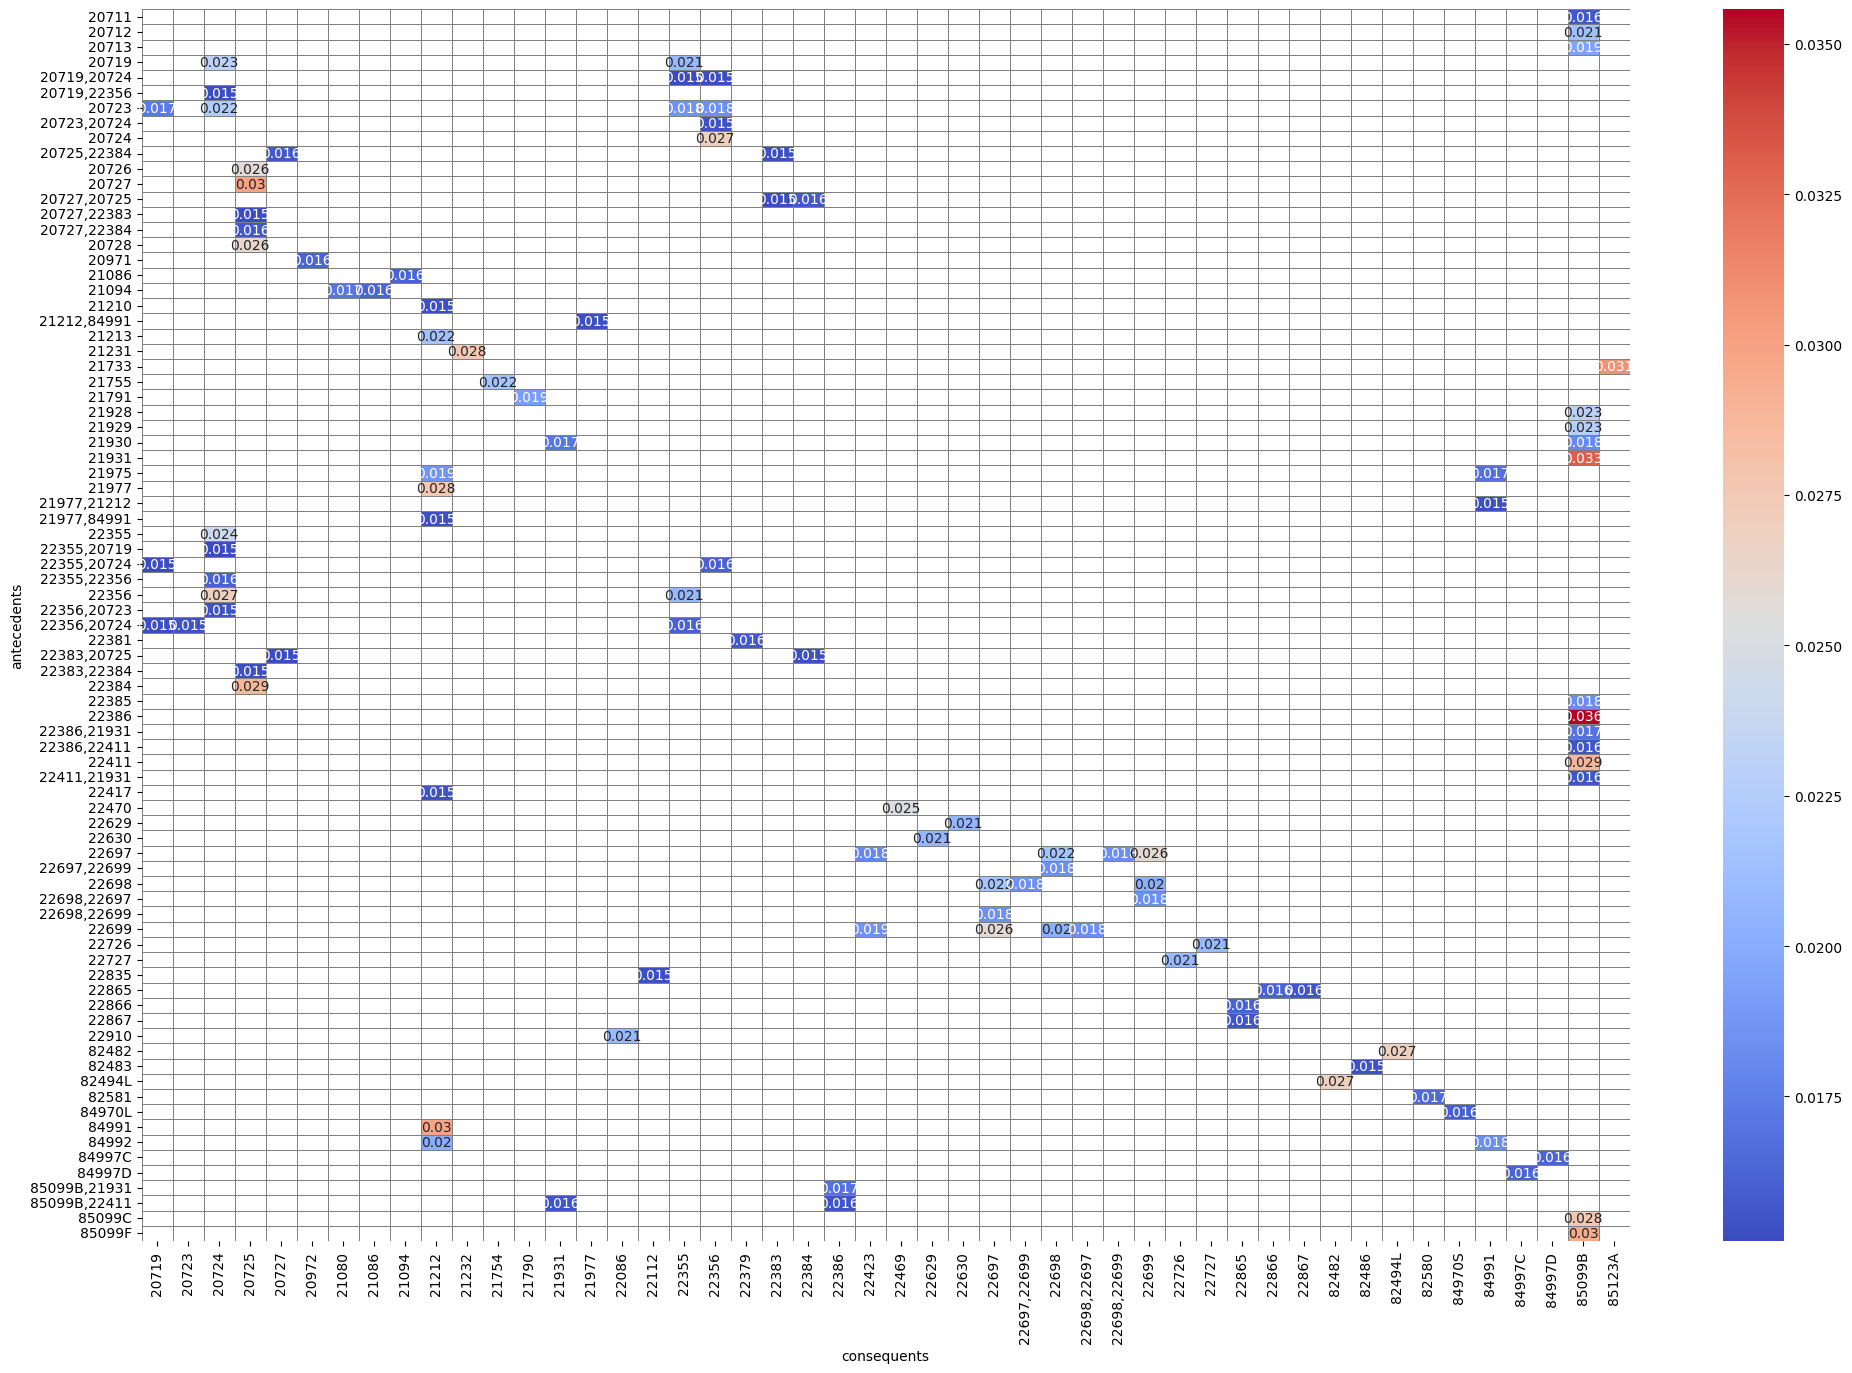

In [ ]:
support_table = rules_filtered.pivot(index='antecedents', columns='consequents',
values='support')
plt.figure(figsize=(24, 16))  # Adjust the width and height
sns.heatmap(support_table, annot=True, linewidths=0.5, linecolor='gray', cmap='coolwarm')
plt.show()

This heatmap visualizes association rules from market basket analysis, showing relationships between antecedent (Y-axis) and consequent (X-axis) items. The color gradient represents the strength of associations, with blue indicating weaker relationships and red denoting stronger ones. Each cell contains a numerical value, likely representing support, confidence, or lift, highlighting how frequently or strongly items are purchased together. The sparse distribution suggests only a few item pairs have significant associations, making this visualization useful for identifying key product pairings in customer purchasing behavior.

## RFM, Clustering & PCA

The analysis begins by establishing a comprehensive RFM framework to assess customer purchasing behavior.
Recency is calculated as the number of days since each customer’s last purchase, determined using the maximum invoice date plus one day.
Frequency is measured by counting the total number of invoices per customer, while Monetary is the sum of each customer's total spending.
To address potential zero values that could skew the analysis, a small constant is added before applying a logarithmic transformation.
This transformation stabilizes the variance and minimizes the impact of outliers in the data. Following this, the transformed data is normalized using StandardScaler, ensuring each feature contributes equally during clustering.
The elbow method is then employed by plotting the Within-Cluster Sum of Squares (WCSS) across different numbers of clusters to identify the optimal cluster count. With the ideal number of clusters determined, the KMeans algorithm segments the customers into distinct groups.
Additionally, Principal Component Analysis (PCA) reduces the dataset to three components, facilitating a clear and concise visualization of the clusters.
This setup lays a robust foundation for deriving actionable insights from customer data.

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


NaN values after log transformation:
 CustomerID      0
Recency         0
Frequency       0
Monetary      476
dtype: int64
NaN values in normalized data: 0


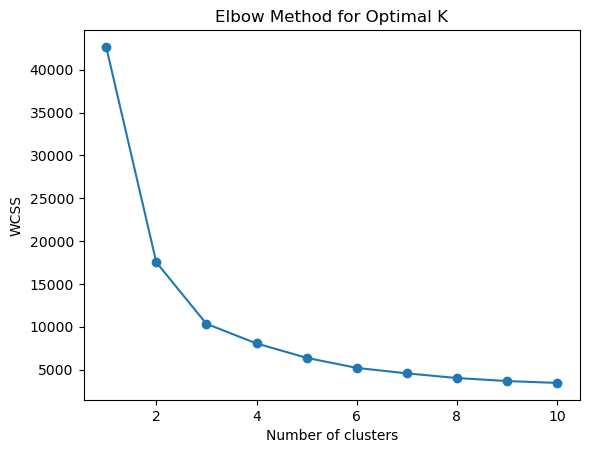

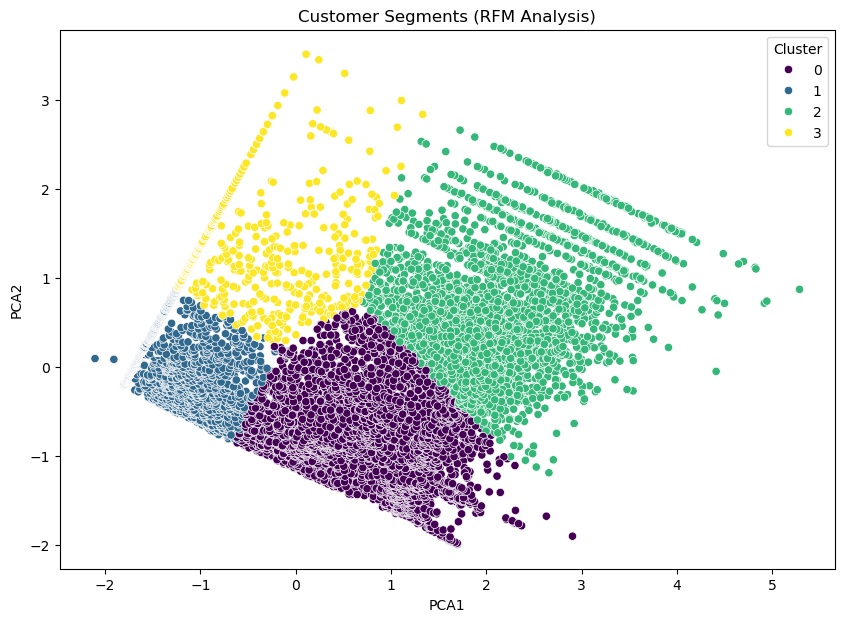

Cluster   Recency           Frequency            Monetary            \
               mean    median      mean    median      mean    median   
0       0  5.725965  5.924256  3.701488  3.637586  6.373621  6.342482   
1       1  6.077994  6.214608  0.796497  0.693147  0.560571  0.009950   
2       2  2.973814  3.135494  4.902735  4.969813  7.647287  7.633423   
3       3  3.723529  3.850148  0.908349  0.693147  0.941880  0.009950   

  CustomerID  
       count  
0       4718  
1       5635  
2       2773  
3       1092

In [ ]:
current_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'count',
    'total_price': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


rfm['Frequency'] = rfm['Frequency'].replace(0, 0.01)
rfm['Monetary'] = rfm['Monetary'].replace(0, 0.01)

rfm['Recency'] = np.log1p(rfm['Recency'])
rfm['Frequency'] = np.log1p(rfm['Frequency'])
rfm['Monetary'] = np.log1p(rfm['Monetary'])


print("NaN values after log transformation:\n", rfm.isna().sum())


rfm.dropna(inplace=True)


scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

print("NaN values in normalized data:", np.isnan(rfm_normalized).sum())


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_normalized)


pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(rfm_normalized)
rfm['PCA1'] = pca_transformed[:, 0]
rfm['PCA2'] = pca_transformed[:, 1]
rfm['PCA3'] = pca_transformed[:, 2]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=rfm, palette='viridis')
plt.title('Customer Segments (RFM Analysis)')
plt.show()



rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median'],
    'CustomerID': 'count'
}).reset_index()


After executing the code, the resulting customer clusters reveal distinct purchasing behaviors with significant business implications. Clusters with low recency alongside high frequency and monetary values typically represent loyal, high-value customers who can be targeted for rewards and retention programs. In contrast, clusters showing high recency values may indicate customers who have not engaged recently and could benefit from reactivation campaigns. The PCA visualization provides an intuitive overview of how these segments are distributed, making it easier to interpret the underlying patterns. This segmentation empowers businesses to tailor their marketing strategies, allocate resources effectively, and design personalized engagement plans. High-value segments can be prioritized with loyalty initiatives, while at-risk groups may be targeted with special offers to reduce churn. Ultimately, this analysis transforms raw transactional data into clear, actionable intelligence that supports data-driven decision-making, optimizing customer engagement and driving revenue growth.

Clusters are as follows:
1. High-Value Segment (Cluster 2): Low recency, high frequency, and high monetary—your “Champions” or “VIPs.”
2. Moderate-Value Lapsed (Cluster 0): Historically decent spenders who need a prompt to return.
3. Recently Engaged, Low Spend (Cluster 3): Potential to nurture into higher-value customers.
4. Largely Inactive (Cluster 1): Biggest group, but with minimal recent engagement—consider reactivation efforts carefully.

In [ ]:
transformed_data =pd.DataFrame(pca_transformed)
transformed_data


0         1         2
0      3.175281  1.608347 -0.021755
1      1.416601 -0.069383  0.273817
2      2.404422  0.495109  0.004267
3      0.277981 -0.603394  0.261610
4      0.263353 -0.742608  0.159966
...         ...       ...       ...
14213  3.258490  1.885242  0.045366
14214  0.508795 -0.030045  1.830239
14215 -0.678718 -0.764950  1.084546
14216 -2.106140  0.093357 -0.532021
14217 -1.908229  0.084488 -0.353428

[14218 rows x 3 columns]

In [ ]:
transformed_data.columns = [f"PC{i+1}" for i in range(rfm_normalized.shape[1])]
transformed_data

PC1       PC2       PC3
0      3.175281  1.608347 -0.021755
1      1.416601 -0.069383  0.273817
2      2.404422  0.495109  0.004267
3      0.277981 -0.603394  0.261610
4      0.263353 -0.742608  0.159966
...         ...       ...       ...
14213  3.258490  1.885242  0.045366
14214  0.508795 -0.030045  1.830239
14215 -0.678718 -0.764950  1.084546
14216 -2.106140  0.093357 -0.532021
14217 -1.908229  0.084488 -0.353428

[14218 rows x 3 columns]

In [ ]:
transformed_data.describe()

PC1           PC2           PC3
count  1.421800e+04  1.421800e+04  1.421800e+04
mean  -6.396784e-17  9.595176e-17  5.197387e-17
std    1.502693e+00  8.173399e-01  2.721755e-01
min   -2.106140e+00 -1.990155e+00 -1.802709e+00
25%   -1.467904e+00 -5.819770e-01 -1.374438e-01
50%   -9.916238e-02 -5.013356e-02 -8.980376e-02
75%    1.204907e+00  4.598471e-01  1.276518e-01
max    5.285484e+00  3.508787e+00  1.960449e+00

In [ ]:
components_df = pd.DataFrame(pca.components_)

components_df.columns =  [ 'Recency', 'Frequency', 'Monetary']
components_df.index = [f"PC{i+1}" for i in range(components_df.shape[0])]
components_df

Recency  Frequency  Monetary
PC1 -0.457523   0.632586  0.624906
PC2 -0.888428  -0.295963 -0.350859
PC3 -0.037000  -0.715710  0.697416

These component loadings show how each principal component (PC) is formed by combining the original RFM variables. In **PC1**, a negative loading on Recency contrasts with positive loadings on Frequency and Monetary, suggesting that this component primarily distinguishes customers who purchase recently (low Recency) and spend more/frequently. In **PC2**, all three loadings are negative, with Recency having the largest magnitude, indicating it captures a dimension heavily influenced by recency variations. Finally, **PC3** shows a very small negative loading for Recency but strong, opposing loadings for Frequency (negative) and Monetary (positive), highlighting a dimension that differentiates customers who purchase more often versus those who spend higher amounts.

<Axes: >

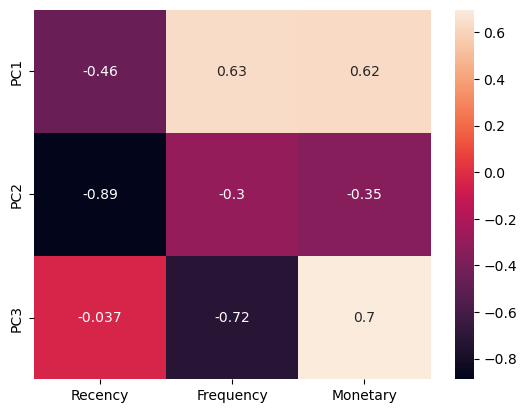

In [ ]:
sns.heatmap(components_df, annot=True)

This heatmap visualizes how each RFM variable (Recency, Frequency, Monetary) contributes to the three principal components (PC1, PC2, PC3). In **PC1**, Recency has a negative loading, while Frequency and Monetary are positively loaded, indicating PC1 captures a contrast between recent versus frequent/high-spending behaviors. In **PC2**, all loadings are negative, with Recency showing the largest magnitude, emphasizing the significance of purchase timing on this dimension. **PC3** highlights the contrast between Frequency (negative) and Monetary (positive), suggesting a trade-off between how often customers buy versus how much they spend per purchase. Overall, the heatmap offers a clear overview of how each original RFM feature influences each principal component.

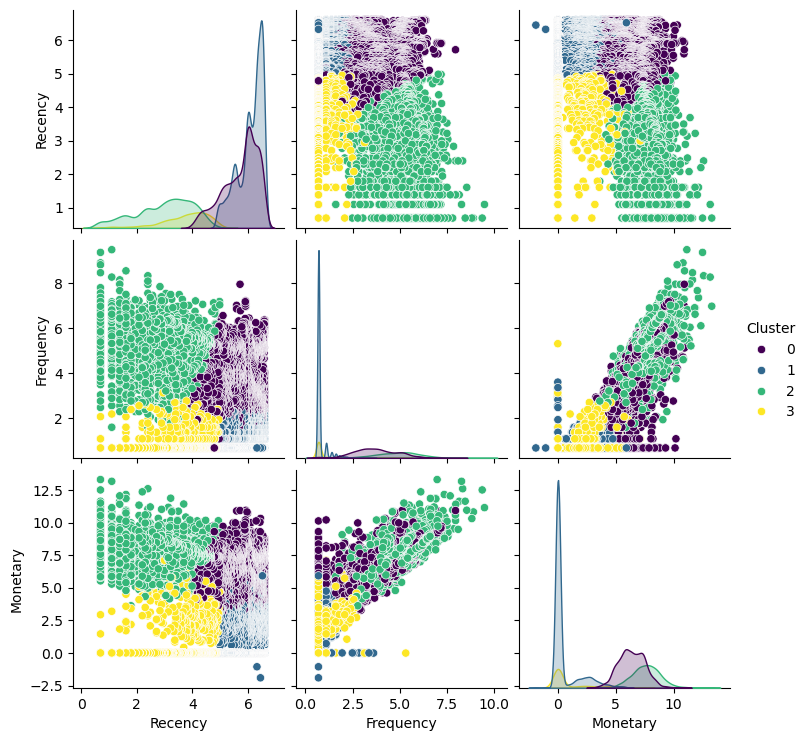

In [ ]:
sns.pairplot(
    rfm,
    vars=['Recency', 'Frequency', 'Monetary'],
    hue='Cluster',
    palette='viridis'
)
plt.show()


This pairplot displays the relationships between the three RFM metrics (Recency, Frequency, Monetary) color‐coded by cluster. The diagonal subplots show the distributions of each metric, illustrating how Recency and Frequency tend to have longer tails, while Monetary is notably skewed. In the scatter plots, Cluster 2 appears concentrated in the lower Recency but higher Frequency and Monetary range, consistent with high-value customers. Clusters 0 and 1 span broader ranges, suggesting more dispersed behaviors, whereas Cluster 3 hovers in a mid-range zone across the metrics. Overall, the pairwise views underscore clear distinctions in purchasing patterns, providing visual confirmation of how each cluster differs in RFM characteristics.

This code generates a 3D scatter plot of the PCA‐transformed RFM data, with each point colored by its assigned cluster. By reducing the original features to three principal components (PCA1, PCA2, PCA3), it allows a more intuitive visual separation of the clusters in three‐dimensional space. Plotly’s interactive features enable easy rotation, zooming, and inspection of the data points. Overall, this visualization provides a clear, high‐level view of how different customer segments group together in the PCA‐based feature space.

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(rfm_normalized)
rfm['PCA1'] = pca_transformed[:, 0]
rfm['PCA2'] = pca_transformed[:, 1]
rfm['PCA3'] = pca_transformed[:, 2]


fig = px.scatter_3d(
    rfm,
    x='PCA1',
    y='PCA2',
    z='PCA3',
    color='Cluster',
    title='Customer Segments (RFM Analysis)',
    color_continuous_scale='Viridis',
    opacity=0.7
)

fig.update_layout(scene = dict(
                    xaxis_title='PCA1',
                    yaxis_title='PCA2',
                    zaxis_title='PCA3'),
                  margin=dict(l=0, r=0, b=0, t=40))

fig.show()


##Clustering Product Descriptions

Clustering product descriptions using K-Means helps uncover hidden patterns in textual data, enabling businesses to categorize products more effectively. By leveraging Natural Language Processing (NLP) techniques, we transform raw product descriptions into structured insights. This process begins with text preprocessing, where unnecessary elements like numbers and punctuation are removed to create a cleaner dataset. Then, the TF-IDF technique converts the text into numerical vectors, capturing the significance of words across descriptions. Using K-Means clustering, similar products are grouped into meaningful categories, revealing distinct product segments such as home decor, fabric-based items, and accessories. Finally, human-readable labels are assigned to each cluster, improving interpretability and enhancing product classification for better decision-making.

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

data_grouped = data.copy()

def clean_text(text):
    text = re.sub(r'\d+', '', str(text))
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower().strip()

data['Clean_Description'] = data['Description'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) and x.startswith('[') else str(x))
data['Clean_Description'] = data['Clean_Description'].apply(clean_text)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data['Clean_Description'])

In [ ]:
feature_names = vectorizer.get_feature_names_out()

In [ ]:
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)
data[['Description', 'Cluster']].head(10)


Description  Cluster
0   WHITE HANGING HEART T-LIGHT HOLDER        3
1                  WHITE METAL LANTERN        5
2       CREAM CUPID HEARTS COAT HANGER        5
3  KNITTED UNION FLAG HOT WATER BOTTLE        5
4       RED WOOLLY HOTTIE WHITE HEART.        5
5         SET 7 BABUSHKA NESTING BOXES        6
6    GLASS STAR FROSTED T-LIGHT HOLDER        3
7               HAND WARMER UNION JACK        5
8            HAND WARMER RED POLKA DOT        5
9        ASSORTED COLOUR BIRD ORNAMENT        5

Cleans product descriptions by removing numbers, punctuation, and converting text to lowercase.Creat a new column, Clean_Description, to store the processed text.

Useing TF-IDF (Term Frequency-Inverse Document Frequency) to convert text into numerical vectors.
The max_features=1000 ensures only the top 1000 important words are considered.
The result is a sparse matrix (X), where each row represents a product description in numerical form.



In [ ]:
# Group descriptions by cluster and view common words
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    print(data[data['Cluster'] == i]['Clean_Description'].head(10).values)



Cluster 0:
['box of  assorted colour teaspoons' 'box of vintage jigsaw blocks'
 'box of vintage alphabet blocks' 'recipe box with metal heart'
 'spaceboy lunch box' 'lunch box i love london' 'circus parade lunch box'
 'victorian sewing box large' 'strawberry lunch box with cutlery'
 'lunch box with cutlery retrospot']

Cluster 1:
['pack of  retrospot cake cases' 'pack of  dinosaur cake cases'
 'pack of  pink paisley cake cases' 'teatime fairy cake cases'
 'ceramic cherry cake money bank' 'ceramic strawberry cake money bank'
 'tier cake tin green and cream' 'tier cake tin red and cream'
 'pack of  pink paisley cake cases' 'teatime fairy cake cases']

Cluster 2:
['charlotte bag dolly girl design' 'jumbo bag pink polkadot'
 'jumbo  bag baroque black white' 'jumbo bag charlie and lola toys'
 'strawberry charlotte bag' 'jumbo storage bag suki'
 'jumbo bag pink vintage paisley' 'jumbo shopper vintage red paisley'
 'skull shoulder bag' 'jumbo shopper vintage red paisley']

Cluster 3:
['white

Uses K-Means clustering to group similar product descriptions into 10 clusters.

In [ ]:
cluster_names = {
    0: "Lunch & Storage Boxes",
    1: "Baking & Cake Accessories",
    2: "Bags & Totes",
    3: "Candle Holders & Lanterns",
    4: "Retrospot Collection",
    5: "Home Decor & Cozy Items",
    6: "Kitchen & Tableware Sets",
    7: "Ivory-Themed Home Accessories",
    8: "Photo Frames & Vintage Decor",
    9: "Cards & Stationery"
}
data['Category'] = data['Cluster'].map(cluster_names)

print(data[['Description', 'Category']].head(20))


                            Description                       Category
0    WHITE HANGING HEART T-LIGHT HOLDER      Candle Holders & Lanterns
1                   WHITE METAL LANTERN        Home Decor & Cozy Items
2        CREAM CUPID HEARTS COAT HANGER        Home Decor & Cozy Items
3   KNITTED UNION FLAG HOT WATER BOTTLE        Home Decor & Cozy Items
4        RED WOOLLY HOTTIE WHITE HEART.        Home Decor & Cozy Items
5          SET 7 BABUSHKA NESTING BOXES       Kitchen & Tableware Sets
6     GLASS STAR FROSTED T-LIGHT HOLDER      Candle Holders & Lanterns
7                HAND WARMER UNION JACK        Home Decor & Cozy Items
8             HAND WARMER RED POLKA DOT        Home Decor & Cozy Items
9         ASSORTED COLOUR BIRD ORNAMENT        Home Decor & Cozy Items
10           POPPY'S PLAYHOUSE BEDROOM         Home Decor & Cozy Items
11            POPPY'S PLAYHOUSE KITCHEN  Ivory-Themed Home Accessories
12    FELTCRAFT PRINCESS CHARLOTTE DOLL        Home Decor & Cozy Items
13    

Products related to home decor (lanterns, t-light holders) are grouped together.
Products related to warmers, woolly items, and fabric-based items belong to the same cluster (Cluster 5).

Manually assigns human-readable names to each cluster.
Uses dictionary mapping (cluster_names) to replace numerical cluster labels with meaningful category names.

##Uncovering Customer Buying Patterns with Apriori Algorithm

---



Using the Apriori algorithm, this analysis identifies frequently purchased product combinations and uncovers hidden relationships in customer transactions. By generating association rules, it reveals key insights, such as strong links between Baking & Cake Accessories and Bags & Totes, as well as Cards & Stationery with Photo Frames & Vintage Decor. These insights help businesses optimize product placement, cross-selling strategies, and inventory management.

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

basket = data.groupby(['InvoiceNo', 'Category'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

<ipython-input-36-b12fc5952d1e>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0) #This line is added
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                          antecedents  \
0         (Baking & Cake Accessories)   
1                      (Bags & Totes)   
2         (Candle Holders & Lanterns)   
3                      (Bags & Totes)   
4                (Cards & Stationery)   
...                               ...   
56997            (Cards & Stationery)   
56998  (Photo Frames & Vintage Decor)   
56999         (Lunch & Storage Boxes)   
57000     (Baking & Cake Accessories)   
57001      (Kitchen & Tableware Sets)   

                                             consequents   support  \
0                                         (Bags & Totes)  0.138649   
1                            (Baking & Cake Accessories)  0.138649   
2                                         (Bags & Totes)  0.130154   
3                            (Candle Holders & Lanterns)  0.130154   
4                                         (Bags & Totes)  0.095714   
...                                                  ...       ...   
56997  (Ivory-The

Transforms the dataset into a transaction-based format (basket). Uses the Apriori algorithm to find frequently purchased product categories together.
Generates association rules to discover patterns in customer purchasing behavior.


Customers who buy Baking & Cake Accessories are likely to buy Bags & Totes (Lift: 1.77).
People buying Candle Holders & Lanterns also tend to purchase Bags & Totes.
Cards & Stationery often appear in baskets containing Photo Frames & Vintage Decor, showing a strong association (Lift: 4.55).

##Enhancing Product Recommendations with K-Nearest Neighbors (KNN)

Identifying similar product categories is crucial for improving recommendations and customer experience. By leveraging K-Nearest Neighbors (KNN) with cosine similarity, we analyze product relationships based on categorical attributes. After converting category labels into numerical vectors using one-hot encoding, the algorithm finds the most similar product categories, helping businesses group related items effectively. This approach enhances recommendation systems by suggesting complementary products, such as home decor items frequently purchased together. Additionally, analyzing seasonal trends in product demand provides valuable insights for inventory planning and marketing strategies.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cosine

category_matrix = pd.get_dummies(data['Category'])

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(category_matrix)
distances, indices = knn.kneighbors(category_matrix.iloc[10].values.reshape(1, -1), n_neighbors=5)

print(data.iloc[indices[0]][['Description', 'Category']])

                                Description                 Category
485000     STAR WREATH DECORATION WITH BELL  Home Decor & Cozy Items
484998  PURPLE DRAWERKNOB ACRYLIC EDWARDIAN  Home Decor & Cozy Items
485002       RED ROCKING HORSE HAND PAINTED  Home Decor & Cozy Items
485001     WHITE ROCKING HORSE HAND PAINTED  Home Decor & Cozy Items
485004          ANGEL DECORATION 3 BUTTONS   Home Decor & Cozy Items


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Uses one-hot encoding (pd.get_dummies) to convert categorical labels into numerical vectors.
K-Nearest Neighbors (KNN) is used with cosine similarity to find categories that are similar to a given product.
The kneighbors() function retrieves 5 most similar categories to the given index (10 in this case).


The algorithm finds products most similar to the given category.
Here, all five items belong to "Home Decor & Cozy Items", meaning that the model effectively groups similar products together.
This can be useful for recommendation systems (e.g., "Customers who liked this product also liked...").

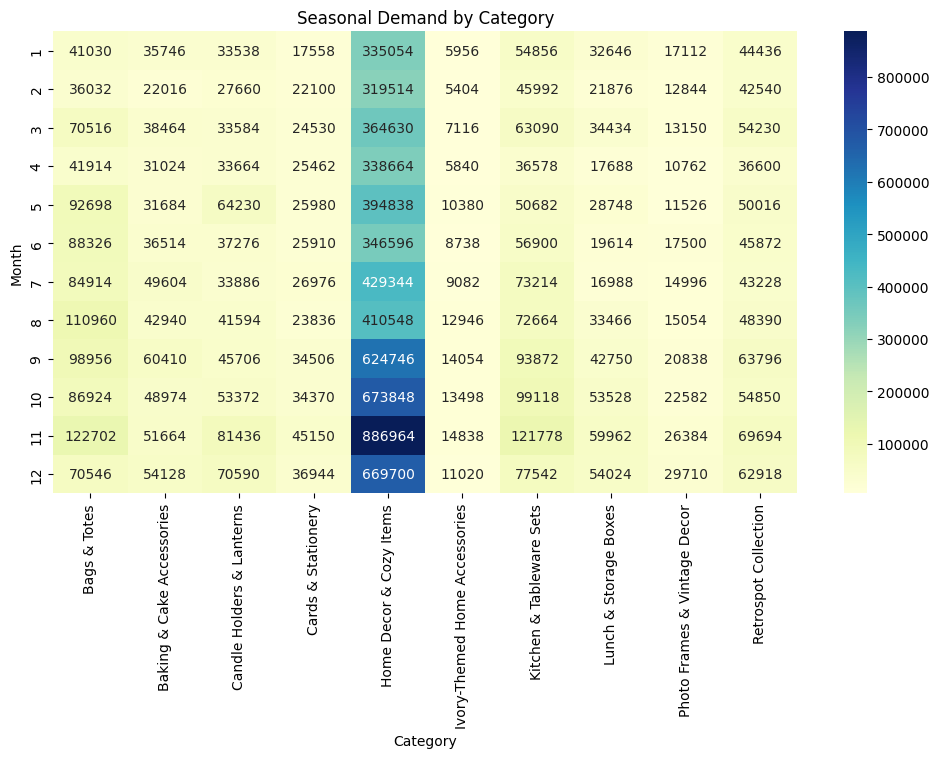

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
monthly_sales = data.groupby([data['InvoiceDate'].dt.month, 'Category'])['Quantity'].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(monthly_sales, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Seasonal Demand by Category")
plt.xlabel("Category")
plt.ylabel("Month")
plt.show()


Peak Seasonality in "Cards & Stationery" (Nov-Dec): High demand due to holiday shopping, with 886,964 units sold in November and 669,700 in December.
"Home Decor & Cozy Items" Surge in Q4 (Oct-Dec): Increased sales indicate a rise in holiday home decoration purchases.
"Bags & Totes" Maintain Steady Demand: A year-round purchase item with no major seasonal spikes.
"Baking & Cake Accessories" Show a Late-Year Rise: Likely influenced by holiday baking and festive packaging needs.

##Uncovering Hidden Themes in Product Descriptions with Topic Modelling (LDA)

Latent Dirichlet Allocation (LDA) is a powerful technique for extracting hidden topics from textual data, helping businesses categorize products more effectively. By analyzing product descriptions, LDA identifies common themes and assigns meaningful labels based on the most relevant words in each topic. Using CountVectorizer, the text is transformed into numerical form, enabling the model to detect patterns and group similar products together. This approach enhances product classification, improves search functionality, and aids in recommendation systems by organizing items into intuitive categories such as Seasonal & Decorative Items, Travel & Home Essentials, and Gifts & Accessories.

We apply Latent Dirichlet Allocation (LDA) to discover hidden topics in product descriptions and assigns meaningful category names based on the top words in each topic.

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Apply LDA (Topic Modeling)
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Display Topics and Most Important Words
for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic {topic_idx}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[-10:]]))  # Show top 10 words per topic



Topic 0:
box, retrospot, pack, pantry, vintage, design, paper, cases, cake, set

Topic 1:
travel, french, regency, suki, love, water, hot, bottle, sign, metal

Topic 2:
wicker, small, blue, pink, polkadot, lunch, red, jumbo, retrospot, bag

Topic 3:
charlotte, white, strawberry, tlight, holder, christmas, wooden, hanging, decoration, heart

Topic 4:
tissues, bakelike, alarm, pack, assorted, clock, glass, colour, girl, dolly


LDA (Latent Dirichlet Allocation) is used to extract 5 topics from product descriptions. The text data is vectorized using CountVectorizer, converting words into numerical representations. The model is trained (lda.fit(X)) to find common themes in the product descriptions.

In [ ]:
topic_assignments = lda.transform(X)

data['Topic'] = topic_assignments.argmax(axis=1)

topic_names = {
    0: "Baking & Party Supplies",
    1: "Travel & Home Essentials",
    2: "Bags & Storage",
    3: "Seasonal & Decorative Items",
    4: "Gifts & Accessories"
}
data['Category'] = data['Topic'].map(topic_names)
print(data[['Description', 'Category']].head(20))

                            Description                     Category
0    WHITE HANGING HEART T-LIGHT HOLDER  Seasonal & Decorative Items
1                   WHITE METAL LANTERN               Bags & Storage
2        CREAM CUPID HEARTS COAT HANGER          Gifts & Accessories
3   KNITTED UNION FLAG HOT WATER BOTTLE     Travel & Home Essentials
4        RED WOOLLY HOTTIE WHITE HEART.               Bags & Storage
5          SET 7 BABUSHKA NESTING BOXES          Gifts & Accessories
6     GLASS STAR FROSTED T-LIGHT HOLDER  Seasonal & Decorative Items
7                HAND WARMER UNION JACK  Seasonal & Decorative Items
8             HAND WARMER RED POLKA DOT      Baking & Party Supplies
9         ASSORTED COLOUR BIRD ORNAMENT          Gifts & Accessories
10           POPPY'S PLAYHOUSE BEDROOM                Bags & Storage
11            POPPY'S PLAYHOUSE KITCHEN               Bags & Storage
12    FELTCRAFT PRINCESS CHARLOTTE DOLL     Travel & Home Essentials
13              IVORY KNITTED MUG 

The extracted topics are mapped to meaningful category names.
The data['Category'] column now contains human-readable labels instead of just topic numbers.


The classification of products using LDA effectively groups items into relevant categories based on their descriptions. For example, "WHITE HANGING HEART T-LIGHT HOLDER" is categorized under Seasonal & Decorative Items, which aligns with its use as a decorative piece. Similarly, "KNITTED UNION FLAG HOT WATER BOTTLE" falls under Travel & Home Essentials, an appropriate classification given its functionality for warmth and comfort. The "SET 7 BABUSHKA NESTING BOXES" is assigned to Gifts & Accessories, making sense as it is a collectible and decorative item often purchased as a gift. Other classifications also reflect logical groupings, such as Bags & Storage for "WHITE METAL LANTERN", and Baking & Party Supplies for "BOX OF VINTAGE ALPHABET BLOCKS". These meaningful topic assignments enhance product categorization, improving searchability, inventory management, and personalized recommendations for customers.

## Conclusion:


Our Market Basket Analysis (MBA) has provided valuable insights into customer purchasing behavior, revealing strong product associations that can drive smarter marketing, improved product recommendations, and optimized inventory management in e-commerce.

*Key Insights & Business Impact:*

  - Frequent Product Associations:

    - High demand for decorative and novelty items, such as WORLD WAR 2 GLIDERS ASSTD DESIGNS and WHITE HANGING HEART T-LIGHT HOLDER.

    - Strong correlations between baking and party supplies (cake cases, popcorn holders), presenting cross-selling opportunities for event-related products.

- Association Rules & Confidence Levels:

    - Filtering by confidence > 50% and lift > 1 revealed 107 strong association rules, meaning these product pairings significantly impact purchasing behavior.
    - These insights can be leveraged for personalized recommendations, ensuring customers receive targeted product suggestions based on past purchases.

- Product Relationship Visualization:

    - The heatmap analysis confirms the strong co-occurrence of specific product categories, further validating bundling strategies and improving customer experience through relevant suggestions.

By utilizing data-driven insights instead of intuition-based strategies, businesses can enhance customer engagement, increase conversion rates, and boost revenue through better product recommendations and marketing efforts.

##Next Steps

To further expand on these insights, the next phase of analysis will focus on:

  - Seasonality Trends: Understanding demand fluctuations to optimize inventory planning and supply chain management.
  - K-Means Clustering: Refining customer segmentation for hyper-personalized marketing and targeted retention strategies.
  - Dimensionality Reduction (PCA/t-SNE): Identifying hidden purchasing behaviors to improve segmentation accuracy.
  - Text Mining & NLP on Product Descriptions: Enhancing product classification and recommendation systems by discovering implicit relationships in product descriptions.
  
These advanced techniques will empower businesses with predictive insights, leading to better decision-making, increased sales, and stronger customer relationships in a competitive e-commerce market.

##AI Statement

For this project, we utilized ChatGPT to assist in brainstorming, refining textual content, and structuring data analysis approaches. The AI provided insights on:

- How to effectively describe the dataset and its attributes.
- Which unsupervised learning models to apply for segmentation.
- Identifying key features relevant to clustering and association rule mining.
- While all final decisions, implementation, and analysis were conducted

independently, ChatGPT served as a supportive tool, enhancing efficiency in content structuring and approach refinement.